In [2]:
import numpy as np
import pandas as pd
import time
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.interpolate import interp1d
from itertools import combinations

In [3]:
from Generators.GA.TestGeneticAlgorithm import GeneticAlgorithm
from Generators.Optimizers.GradientDescent import GradientDescent
from Generators.Optimizers.GuidedLocalSearch import GuidedLocalSearch
from Generators.Optimizers.HillClimbAlgorithm import HillClimbAlgorithm
from Generators.Optimizers.MicrocanonicalAnnealing import MicrocanonicalAnnealing
from Generators.Optimizers.ParticleSwarm import ParticleSwarm
from Generators.Optimizers.SimulatedAnnealing import SimulatedAnnealing
from Generators.Optimizers.TabuSearch import TabuSearch
from Generators.Optimizers.AdaptiveTabuSearch import AdaptiveTabuSearch

kwargs = {
    'cnn_model_path': 'Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'early_stopping_patience': 100,
}
target_expressions = [0, 0.25, 0.5, 0.75, 1]

iterations = 5

optimizers = {
    'Genetic Algorithm': GeneticAlgorithm,
    'Gradient Descent': GradientDescent,
    'Guided Local Search': GuidedLocalSearch,
    'Hill Climb Algorithm': HillClimbAlgorithm,
    'Microcanonical Annealing': MicrocanonicalAnnealing,
    'Particle Swarm': ParticleSwarm,
    'Simulated Annealing': SimulatedAnnealing,
    'Tabu Search': TabuSearch,
    'Adaptive Tabu Search': AdaptiveTabuSearch,
}

### Testing Each Optimizer
---

In [3]:
results = {
    'optimizer': [],
    'target_expression': [],
    'iteration': [],
    'sequence': [],
    'prediction': [],
    'error': [],
    'runtime': [],
    'prediction_history': [],
    'error_history': [],
}

for optimizer_name, optimizer_class in optimizers.items():
    for target_expression in target_expressions:
        for i in range(1, iterations+1):

            print(f'{optimizer_name} | target_expression = {target_expression} | Iteration {i}', end='\r')
        
            convergence = []
            
            obj = optimizer_class(
                **kwargs,
                target_expression=target_expression,
                seed=i,
            )
            start_time = time.time()
            best_sequence, best_prediction, best_error = obj.run()
            end_time = time.time()
            prediction_history = obj.prediction_history

            prediction_history = np.array(prediction_history).flatten()
            error_history = np.array([abs(target_expression - pred) for pred in prediction_history])

            results['optimizer'].append(optimizer_name)
            results['target_expression'].append(target_expression)
            results['iteration'].append(i)
            results['sequence'].append(best_sequence)
            results['prediction'].append(best_prediction)
            results['error'].append(best_error)
            results['runtime'].append(end_time - start_time)
            results['prediction_history'].append(list(prediction_history))
            results['error_history'].append(list(error_history))

            print(' ' * 100, end='\r')
    print(f'{optimizer_name} Complete')

print('Evaluation Complete')

results_df = pd.DataFrame(results)
results_df.to_csv('Data/optimizer_evaluation_results.csv', index=False)
results_df.head()

Genetic Algorithm Complete                                                                          
Gradient Descent Complete                                                                           
Guided Local Search Complete                                                                        


2025-05-07 10:44:44,679 - tensorflow - WARNING - 5 out of the last 18 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000200B4AC9B20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


Hill Climb Algorithm Complete                                                                       
Microcanonical Annealing Complete                                                                   
Particle Swarm Complete                                                                             
Simulated Annealing Complete                                                                        
Tabu Search Complete                                                                                
Adaptive Tabu Search Complete                                                                       
Evaluation Complete


optimizer  target_expression  iteration  \
0  Genetic Algorithm                0.0          1   
1  Genetic Algorithm                0.0          2   
2  Genetic Algorithm                0.0          3   
3  Genetic Algorithm                0.0          4   
4  Genetic Algorithm                0.0          5   

                                            sequence  prediction     error  \
0  AATACTAGAGGTCTTCCGACCTATTGTTGCCCCCCTTCACTTTGTT...    0.125271  0.125271   
1  AATACTAGAGGTCTTCCGACCCTAGCCTTTTGCATCCAACCGCACG...    0.128758  0.128758   
2  AATACTAGAGGTCTTCCGACGCATTCGTTATTGGCACCCCACGCTT...    0.107874  0.107874   
3  AATACTAGAGGTCTTCCGACCTCTTGCATTGCCCCCGCTCCTAATG...    0.136499  0.136499   
4  AATACTAGAGGTCTTCCGACCCTAATTCGGCTTGTCGCCCCCGCTC...    0.134320  0.134320   

     runtime                                 prediction_history  \
0   9.327174  [0.19003505, 0.1742371, 0.1742371, 0.1742371, ...   
1  10.109105  [0.21155733, 0.20428011, 0.20349696, 0.1908876...   
2  14.538226  [0.20979398, 0.18558095, 0.18558095, 0.1823005...   
3  11.628782  [0.19595844, 0.19370854, 0.190929, 0.18500704,...   
4  13.142080  [0.21676664, 0.19829234, 0.19033377, 0.1816486...   

                                       error_history  
0  [0.19003504514694214, 0.17423710227012634, 0.1...  
1  [0.2115573287010193, 0.20428010821342468, 0.20...  
2  [0.20979398488998413, 0.18558095395565033, 0.1...  
3  [0.1959584355354309, 0.19370853900909424, 0.19...  
4  [0.21676664054393768, 0.1982923448085785, 0.19...

### Helper Functions
---

In [4]:
# Average each optimizer's results across iterations
def average_tests(df):
    def average_lists(series_of_lists):
        return np.mean(list(zip(*series_of_lists)), axis=1).tolist()

    grouped = df.groupby(['optimizer', 'target_expression'])

    return grouped.agg({
        'prediction': 'mean',
        'error': 'mean',
        'runtime': 'mean',
        'prediction_history': average_lists,
        'error_history': average_lists
    }).reset_index()

# Get the best test for each optimizer and target expression
def best_tests(df):
    grouped = df.groupby(['optimizer', 'target_expression'])
    best_rows = []
    for (optimizer, target), group in grouped:
        best_error_idx = group['error'].idxmin()
        best_row = group.loc[best_error_idx]

        best_rows.append({
            'optimizer': optimizer,
            'target_expression': target,
            'sequence': best_row['sequence'],
            'prediction': best_row['prediction'],
            'error': best_row['error'],
            'runtime': best_row['runtime'],
            'prediction_history': best_row['prediction_history'],
            'error_history': best_row['error_history'],
        })
    return pd.DataFrame(best_rows)

# returns a list of predictions that are the best seen so far for each iteration
def calculate_best_prediction_history(prediction_history, target_expression):
    best_prediction = prediction_history[0]
    best_prediction_history = [best_prediction]

    for i in range(1, len(prediction_history)):
        current_prediction = prediction_history[i]
        if abs(current_prediction - target_expression) < abs(best_prediction - target_expression):
            best_prediction = current_prediction
        best_prediction_history.append(best_prediction)
    
    return best_prediction_history


def dynamic_standardize_prediction_history(df):
    df['prediction_rate'] = df.apply(lambda row: len(row['prediction_history']) / row['runtime'], axis=1)
    max_rate = df['prediction_rate'].max()

    def resample_predictions(predictions, runtime, max_rate):
        num_points = int(max_rate * runtime)
        if num_points < 2:
            return [predictions[0]] * 2
        
        original_time = np.linspace(0, runtime, len(predictions))
        standardized_time = np.linspace(0, runtime, num_points)
        interpolated_predictions = np.interp(standardized_time, original_time, predictions)
        return interpolated_predictions.tolist()

    df['prediction_history'] = df.apply(
        lambda row: resample_predictions(row['prediction_history'], row['runtime'], max_rate),
        axis=1
    )
    return df

### Plotting
---

In [5]:
color_map = {
    'Genetic Algorithm' : 'tab:blue',
    'Gradient Descent' : 'grey',
    'Guided Local Search' : 'forestgreen',
    'Hill Climb Algorithm' : 'lightcoral',
    'Microcanonical Annealing' : 'darkturquoise',
    'Particle Swarm' : 'darkviolet',
    'Simulated Annealing' : 'darkorange',
    'Tabu Search' : 'red',
    'Adaptive Tabu Search' : 'mediumspringgreen',
}

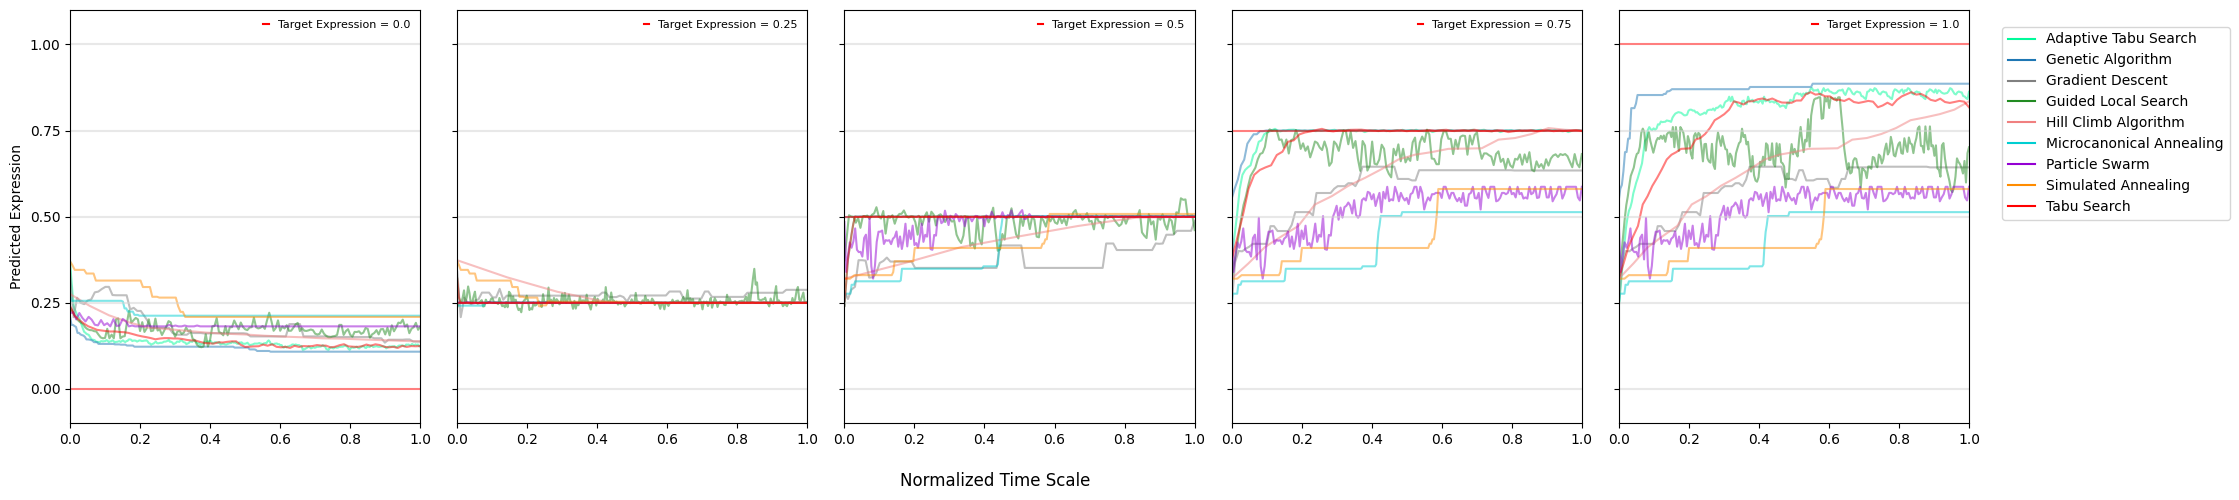

In [6]:

# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

# -------------- Get The Best Test For Each Optimizer And Target Expression --------------

df_exploded = results_df.explode('prediction_history').reset_index(drop=True)
df_exploded['prediction_history'] = df_exploded['prediction_history'].astype(float)

df_exploded['iteration'] = df_exploded.groupby(['optimizer', 'target_expression']).cumcount()
group_sizes = df_exploded.groupby(['optimizer', 'target_expression'])['prediction_history'].transform('count')
df_exploded['normalized_time_scale'] = df_exploded['iteration'] / (group_sizes - 1)

# -------------- Plot The Errors Over Time --------------

optimizer_names = df_exploded['optimizer'].unique()

target_expressions = df_exploded['target_expression'].unique()

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    for optimizer in optimizer_names:
        group = df_exploded[
            (df_exploded['target_expression'] == target_expr) &
            (df_exploded['optimizer'] == optimizer)
        ]
        if not group.empty:
            ax.plot(
                group['normalized_time_scale'],
                group['prediction_history'],
                color=color_map[optimizer],
                alpha=0.5,
                label=optimizer
            )

    # plot target expression lines
    for each in target_expressions:
        color = 'lightgrey' if each != target_expr else 'red'
        ax.axhline(y=each, color=color, linestyle='-', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='red', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 1)
    # ax.set_title(f'Target: {target_expr}')

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Normalized Time Scale")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


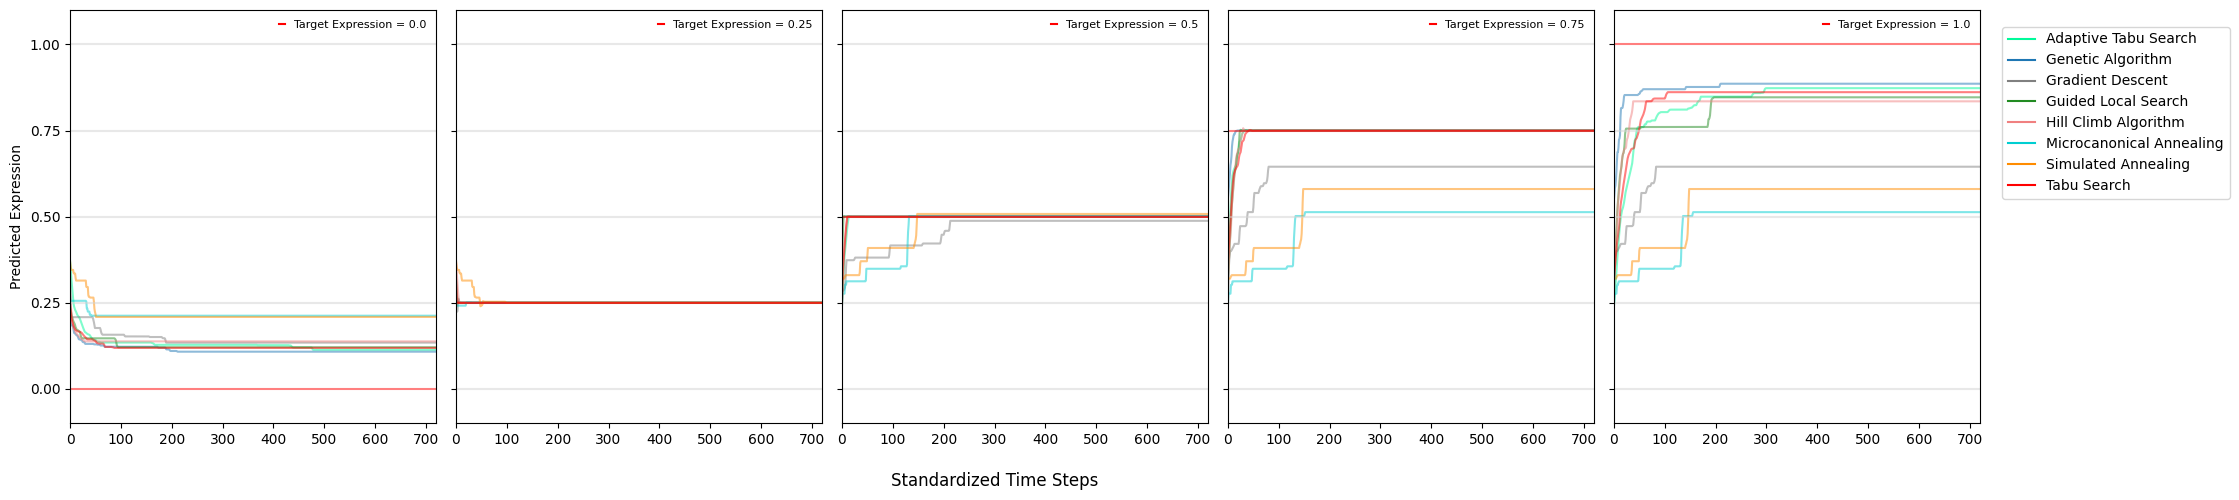

In [7]:

# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)


# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()

results_df['prediction_history'] = results_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# -------------- Plot The Errors Over Time --------------

optimizer_names = results_df['optimizer'].unique()

target_expressions = results_df['target_expression'].unique()

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    for optimizer in optimizer_names:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )


    # plot target expression lines
    for each in target_expressions:
        color = 'lightgrey' if each != target_expr else 'red'
        ax.axhline(y=each, color=color, linestyle='-', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='red', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, max_length)

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Standardized Time Steps")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


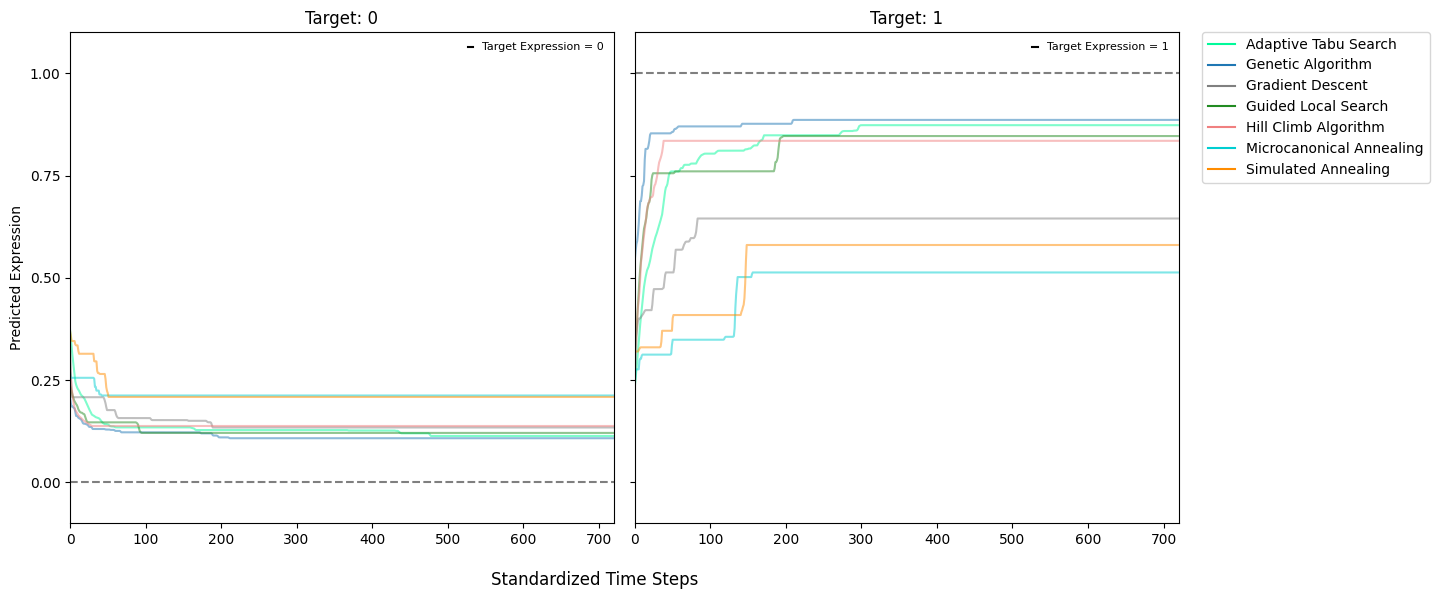

In [8]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']
results_df = results_df[results_df['optimizer'] != 'Tabu Search']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()

results_df['prediction_history'] = results_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# -------------- Plot The Errors Over Time --------------

optimizer_names = results_df['optimizer'].unique()

target_expressions = [0, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    for optimizer in optimizer_names:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )


    # plot target expression lines
    ax.axhline(y=target_expr, color='black', linestyle='--', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='black', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, max_length)
    ax.set_title(f'Target: {target_expr}')

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Standardized Time Steps")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


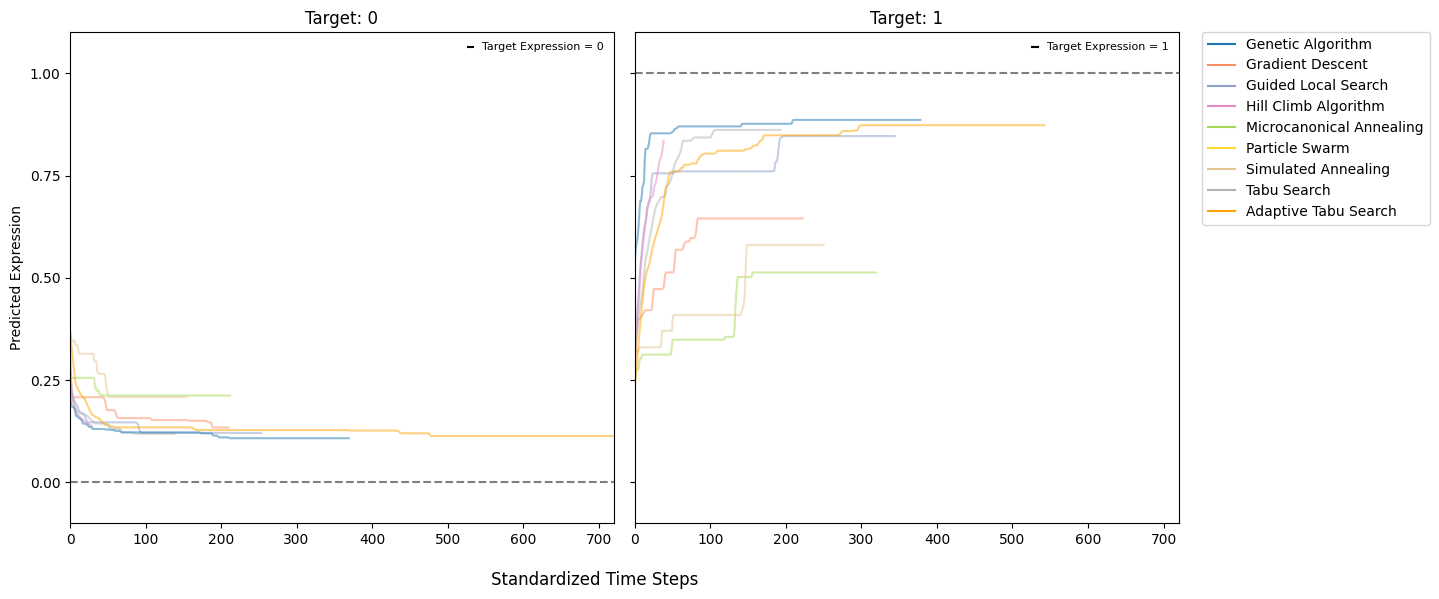

In [9]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()

# ---------- Define The Optimizer Colors, Order, and Target Expressions ----------

optimizer_names = optimizers.keys()

bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Adaptive Tabu Search': 'orange',
}
muted_optimizers = {name: plt.cm.Set2(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

optimizer_plot_order = list(muted_optimizers.keys()) + list(bold_optimizers.keys())

target_expressions = [0, 1]

# -------------- Plot The Errors Over Time --------------

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    # plot the muted optimizers, then the bold optimizers (using optimizer_plot_order)
    for optimizer in optimizer_plot_order:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )


    # plot target expression lines
    ax.axhline(y=target_expr, color='black', linestyle='--', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='black', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, max_length)
    ax.set_title(f'Target: {target_expr}')

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Standardized Time Steps")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


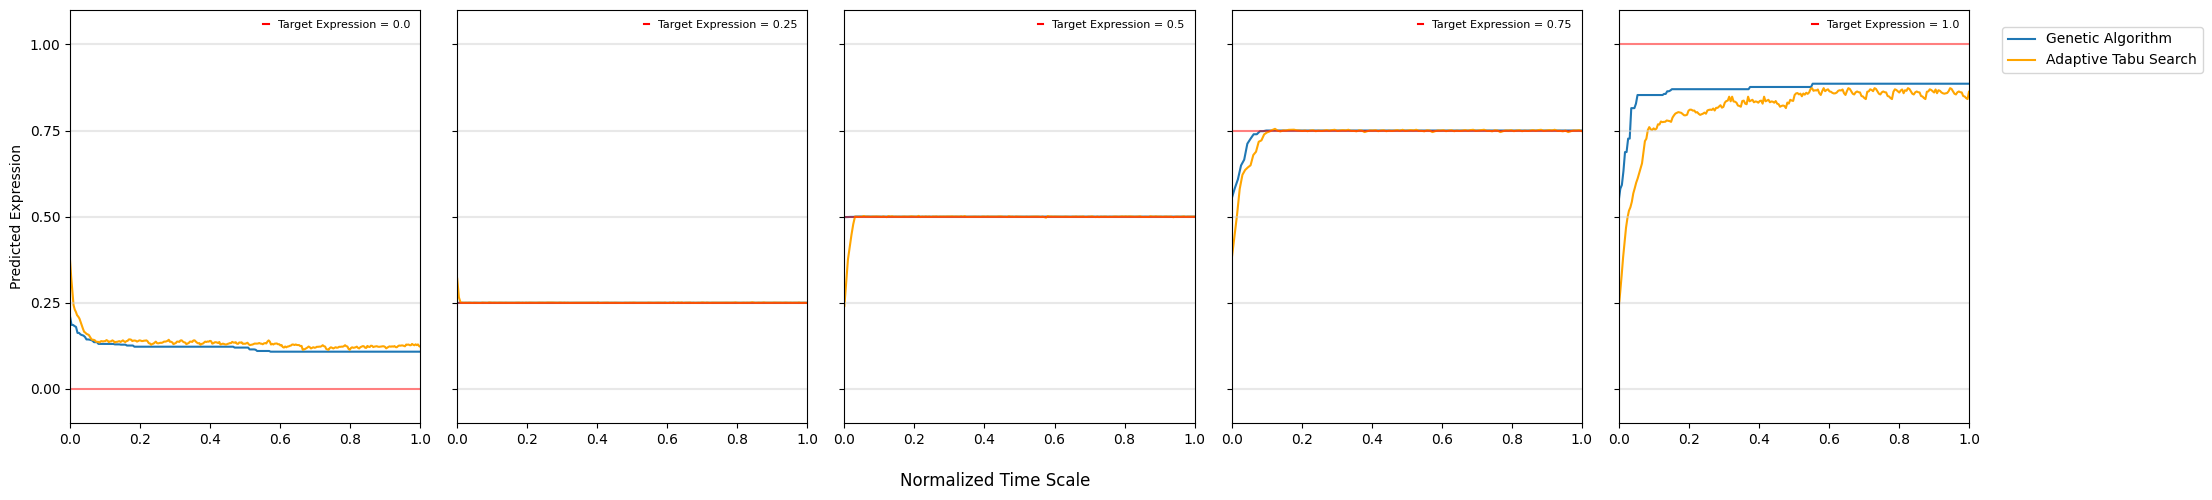

In [10]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

# -------------- Get The Best Test For Each Optimizer And Target Expression --------------

df_exploded = results_df.explode('prediction_history').reset_index(drop=True)
df_exploded['prediction_history'] = df_exploded['prediction_history'].astype(float)

df_exploded['iteration'] = df_exploded.groupby(['optimizer', 'target_expression']).cumcount()
group_sizes = df_exploded.groupby(['optimizer', 'target_expression'])['prediction_history'].transform('count')
df_exploded['normalized_time_scale'] = df_exploded['iteration'] / (group_sizes - 1)

# ---------- Define The Optimizer Colors, Order, and Target Expressions ----------

optimizer_names = ['Genetic Algorithm', 'Adaptive Tabu Search']

color_map = {
    'Genetic Algorithm': 'tab:blue',
    'Adaptive Tabu Search': 'orange'
}

target_expressions = df_exploded['target_expression'].unique()

# -------------- Plot The Errors Over Time --------------

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    for optimizer in optimizer_names:
        group = df_exploded[
            (df_exploded['target_expression'] == target_expr) &
            (df_exploded['optimizer'] == optimizer)
        ]
        if not group.empty:
            ax.plot(
                group['normalized_time_scale'],
                group['prediction_history'],
                color=color_map[optimizer],
                alpha=1,
                label=optimizer
            )

    # plot target expression lines
    for each in target_expressions:
        color = 'lightgrey' if each != target_expr else 'red'
        label = f'Target Expression = {each}' if each == target_expr else None
        ax.axhline(y=each, color=color, linestyle='-', alpha=0.5, label=label)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='red', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 1)

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Normalized Time Scale")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


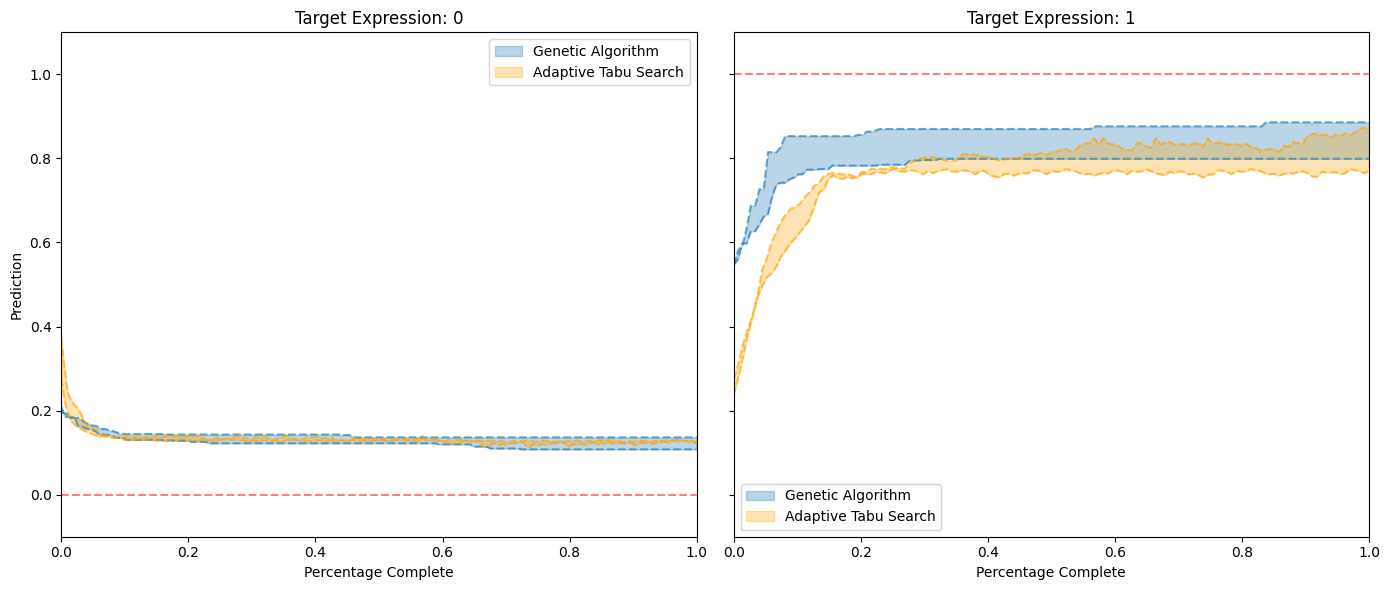

In [11]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# Filter only the optimizers of interest
optimizers_of_interest = ['Genetic Algorithm', 'Adaptive Tabu Search']
filtered_df = results_df[results_df['optimizer'].isin(optimizers_of_interest)].copy()

# Compute percentage complete per optimizer/target_expression group
filtered_df['normalized_time_scale'] = filtered_df.groupby(
    ['optimizer', 'target_expression']
)['iteration'].transform(lambda x: x / x.max())

# Setup the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
target_expressions = [0, 1]

color_map = {
    'Genetic Algorithm': 'tab:blue',
    'Adaptive Tabu Search': 'orange'
}

for idx, target in enumerate(target_expressions):
    ax = axes[idx]
    ax.set_title(f'Target Expression: {target}')
    ax.set_xlabel('Percentage Complete')
    if idx == 0:
        ax.set_ylabel('Prediction')

    for optimizer in optimizers_of_interest:
        subset = filtered_df[
            (filtered_df['optimizer'] == optimizer) &
            (filtered_df['target_expression'] == target)
        ]

        if subset.empty:
            continue

        min_row = subset.loc[subset['error'].idxmin()]
        max_row = subset.loc[subset['error'].idxmax()]

        min_hist = np.array(min_row['prediction_history'])
        max_hist = np.array(max_row['prediction_history'])

        # Ensure both histories are the same length
        min_len = min(len(min_hist), len(max_hist))
        min_hist = min_hist[:min_len]
        max_hist = max_hist[:min_len]

        # Create normalized_time_scale x-axis for the run
        x = np.linspace(0, 1, min_len)

        ax.fill_between(x, min_hist, max_hist, alpha=0.3, label=f'{optimizer}', color=color_map[optimizer])
        ax.plot(x, min_hist, linestyle='--', alpha=0.6, color=color_map[optimizer])
        ax.plot(x, max_hist, linestyle='--', alpha=0.6, color=color_map[optimizer])

    ax.axhline(y=target, color='red', linestyle='--', alpha=0.5)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 1)

    ax.legend()

plt.tight_layout()
plt.show()


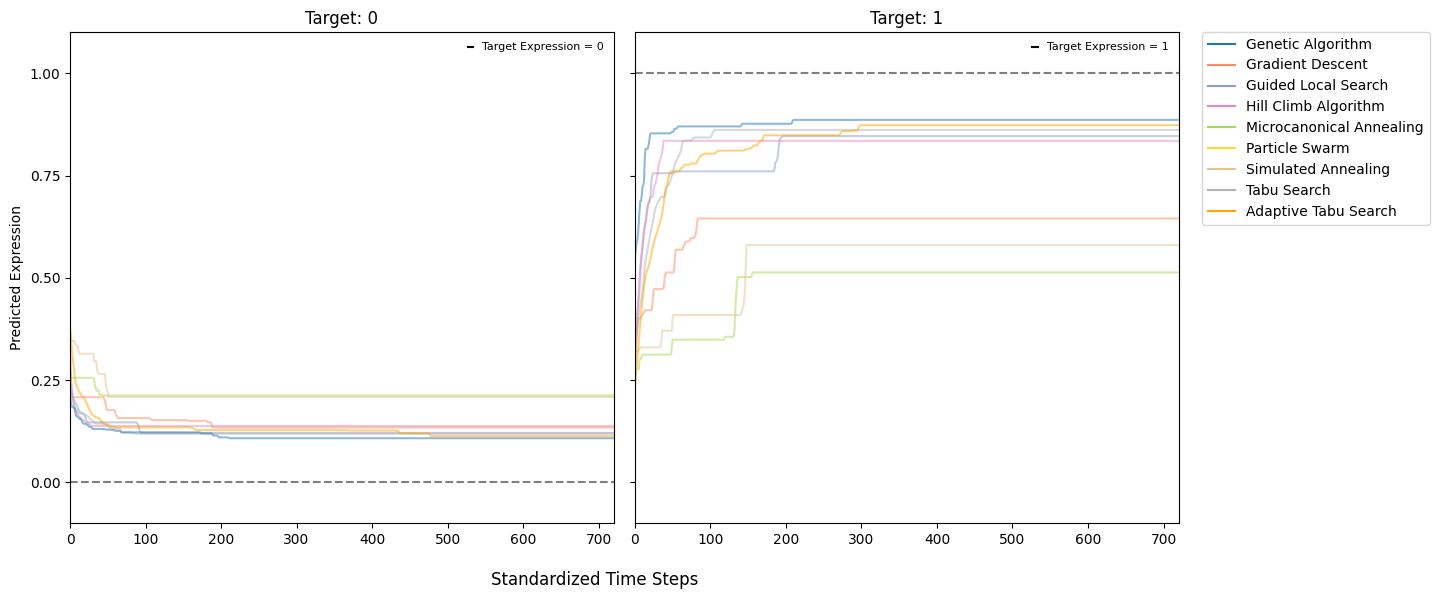

In [12]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()

results_df['prediction_history'] = results_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# ---------- Define The Optimizer Colors, Order, and Target Expressions ----------

optimizer_names = optimizers.keys()

bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Adaptive Tabu Search': 'orange',
}
muted_optimizers = {name: plt.cm.Set2(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

optimizer_plot_order = list(muted_optimizers.keys()) + list(bold_optimizers.keys())

target_expressions = [0, 1]

# -------------- Plot The Errors Over Time --------------

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    # plot the muted optimizers, then the bold optimizers (using optimizer_plot_order)
    for optimizer in optimizer_plot_order:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )


    # plot target expression lines
    ax.axhline(y=target_expr, color='black', linestyle='--', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='black', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, max_length)
    ax.set_title(f'Target: {target_expr}')

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')
fig.supxlabel("Standardized Time Steps")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
# plt.savefig('Data/Figure 6b.png', dpi=300, bbox_inches='tight')
plt.show()


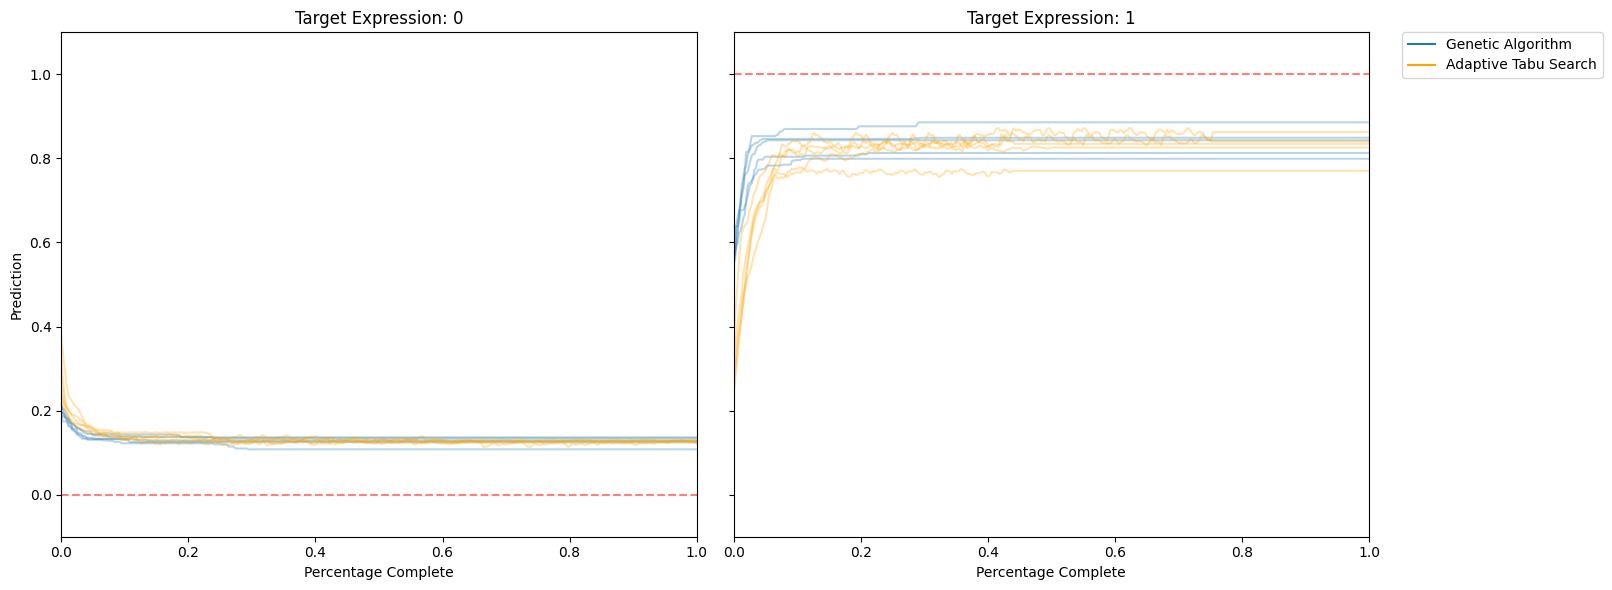

In [13]:
# Load and parse list-like columns
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# Filter only the optimizers of interest
optimizers_of_interest = ['Genetic Algorithm', 'Adaptive Tabu Search']
filtered_df = results_df[results_df['optimizer'].isin(optimizers_of_interest)].copy()

filtered_df = dynamic_standardize_prediction_history(filtered_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = filtered_df['prediction_history'].apply(len).max()

filtered_df['prediction_history'] = filtered_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# Setup the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
target_expressions = [0, 1]

color_map = {
    'Genetic Algorithm': 'tab:blue',
    'Adaptive Tabu Search': 'orange'
}

for idx, target in enumerate(target_expressions):
    ax = axes[idx]
    ax.set_title(f'Target Expression: {target}')
    ax.set_xlabel('Percentage Complete')
    if idx == 0:
        ax.set_ylabel('Prediction')

    for optimizer in optimizers_of_interest:
        subset = filtered_df[
            (filtered_df['optimizer'] == optimizer) &
            (filtered_df['target_expression'] == target)
        ]

        for _, row in subset.iterrows():
            prediction_history = np.array(row['prediction_history'])
            x = np.linspace(0, 1, len(prediction_history))
            ax.plot(x, prediction_history, color=color_map[optimizer], alpha=0.3)
    
    ax.axhline(y=target, color='red', linestyle='--', alpha=0.5)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, 1)

handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizers_of_interest]
fig.legend(
    handles=handles,
    labels=optimizers_of_interest,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
plt.show()


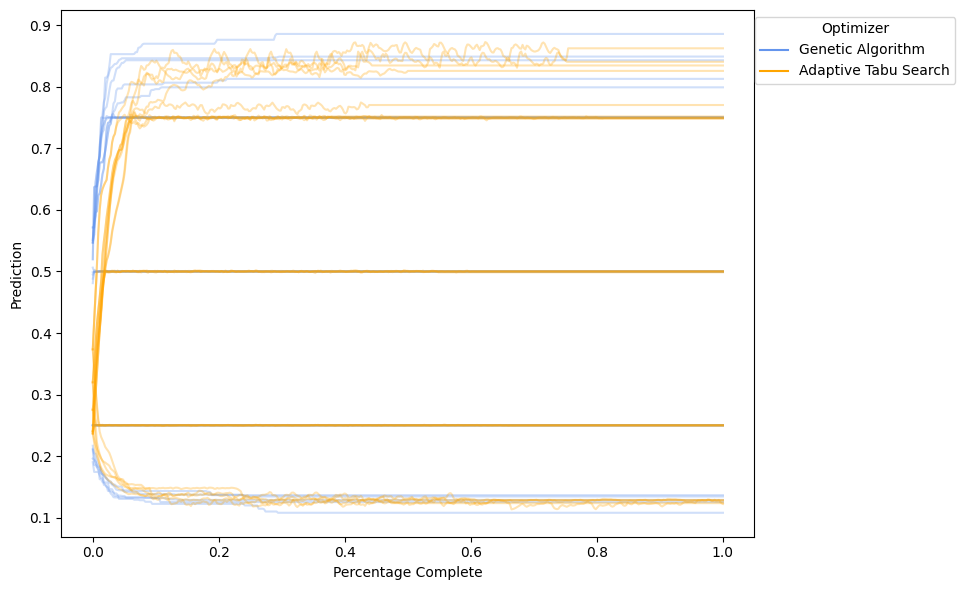

In [14]:
# Load and parse list-like columns
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# Filter only the optimizers of interest
optimizers_of_interest = ['Genetic Algorithm', 'Adaptive Tabu Search']
filtered_df = results_df[results_df['optimizer'].isin(optimizers_of_interest)].copy()

filtered_df = dynamic_standardize_prediction_history(filtered_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = filtered_df['prediction_history'].apply(len).max()

filtered_df['prediction_history'] = filtered_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

target_expressions = sorted(results_df['target_expression'].unique())

# Color map for target_expression values
color_map = {
    'Genetic Algorithm': 'cornflowerblue',
    'Adaptive Tabu Search': 'orange',
}

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all runs
for optimizer in optimizers_of_interest:
    for target in target_expressions:
        subset = filtered_df[
            (filtered_df['optimizer'] == optimizer) &
            (filtered_df['target_expression'] == target)
        ]

        for _, row in subset.iterrows():
            prediction_history = np.array(row['prediction_history'])
            x = np.linspace(0, 1, len(prediction_history))  # percentage complete
            ax.plot(x, prediction_history, color=color_map.get(optimizer, 'gray'), alpha=0.3)

# Create custom legend
handles = [plt.Line2D([], [], color=color_map[optimizer], label=str(optimizer)) for optimizer in optimizers_of_interest]

# put legend outside the plot
ax.legend(handles=handles, title="Optimizer", loc='upper right', bbox_to_anchor=(1.3, 1))

ax.set_xlabel("Percentage Complete")
ax.set_ylabel("Prediction")

plt.tight_layout()
plt.show()


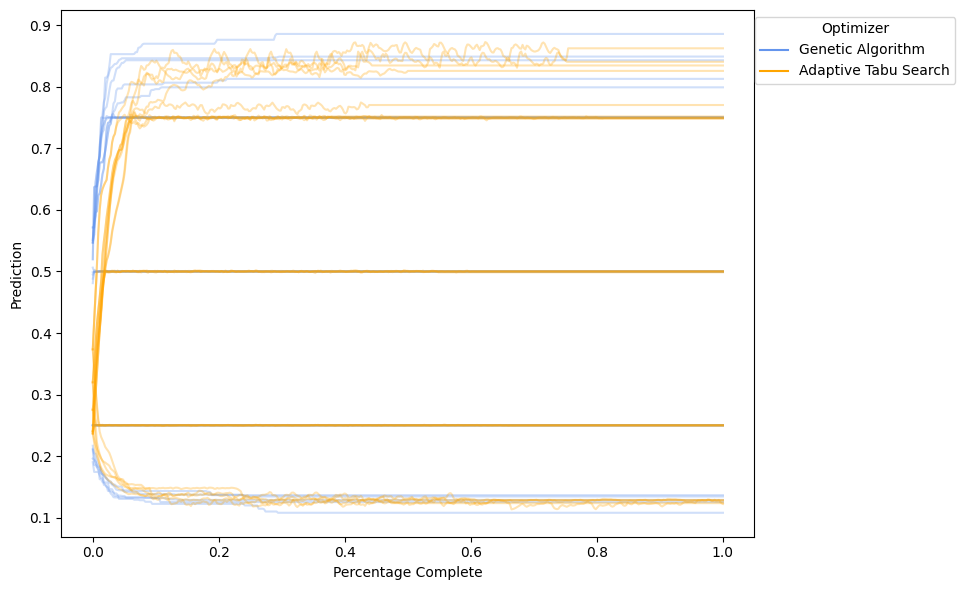

In [15]:
# Load and parse list-like columns
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# Filter only the optimizers of interest
optimizers_of_interest = ['Genetic Algorithm', 'Adaptive Tabu Search']
filtered_df = results_df[results_df['optimizer'].isin(optimizers_of_interest)].copy()

filtered_df = dynamic_standardize_prediction_history(filtered_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = filtered_df['prediction_history'].apply(len).max()

filtered_df['prediction_history'] = filtered_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

target_expressions = sorted(results_df['target_expression'].unique())

# Color map for target_expression values
color_map = {
    'Genetic Algorithm': 'cornflowerblue',
    'Adaptive Tabu Search': 'orange',
}

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all runs
for optimizer in optimizers_of_interest:
    for target in target_expressions:
        subset = filtered_df[
            (filtered_df['optimizer'] == optimizer) &
            (filtered_df['target_expression'] == target)
        ]

        for _, row in subset.iterrows():
            prediction_history = np.array(row['prediction_history'])
            x = np.linspace(0, 1, len(prediction_history))  # percentage complete
            ax.plot(x, prediction_history, color=color_map.get(optimizer, 'gray'), alpha=0.3)

# Create custom legend
handles = [plt.Line2D([], [], color=color_map[optimizer], label=str(optimizer)) for optimizer in optimizers_of_interest]

# put legend outside the plot
ax.legend(handles=handles, title="Optimizer", loc='upper right', bbox_to_anchor=(1.3, 1))

ax.set_xlabel("Percentage Complete")
ax.set_ylabel("Prediction")

plt.tight_layout()
plt.show()


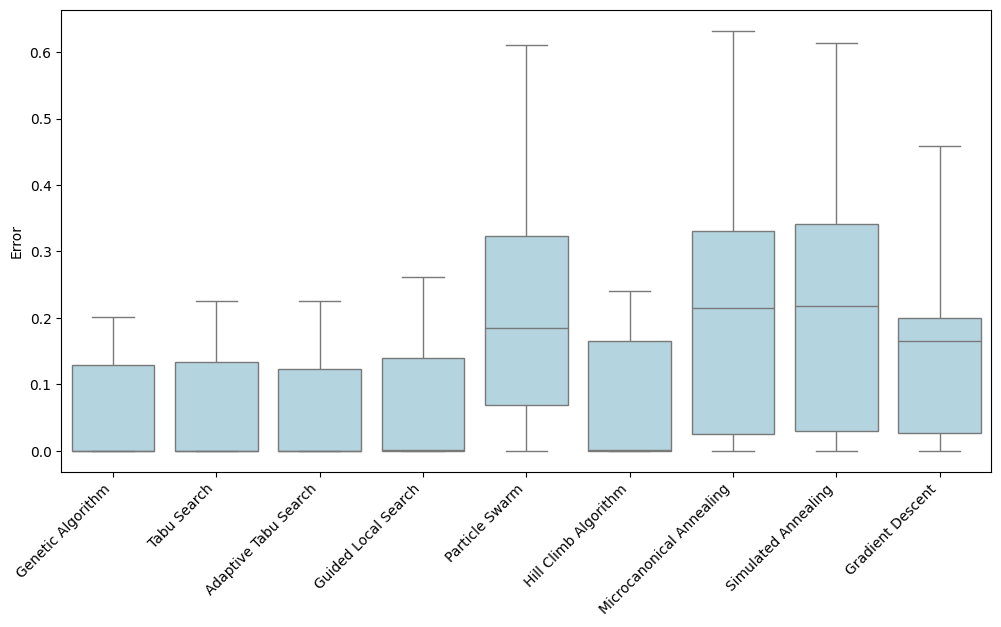

In [16]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df = results_df.sort_values(by='error')

# Plotting the error for each optimizer
plt.figure(figsize=(12, 6))
sns.boxplot(x='optimizer', y='error', data=results_df, color='lightblue',
            order=results_df['optimizer'].unique())
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Error')
plt.show()


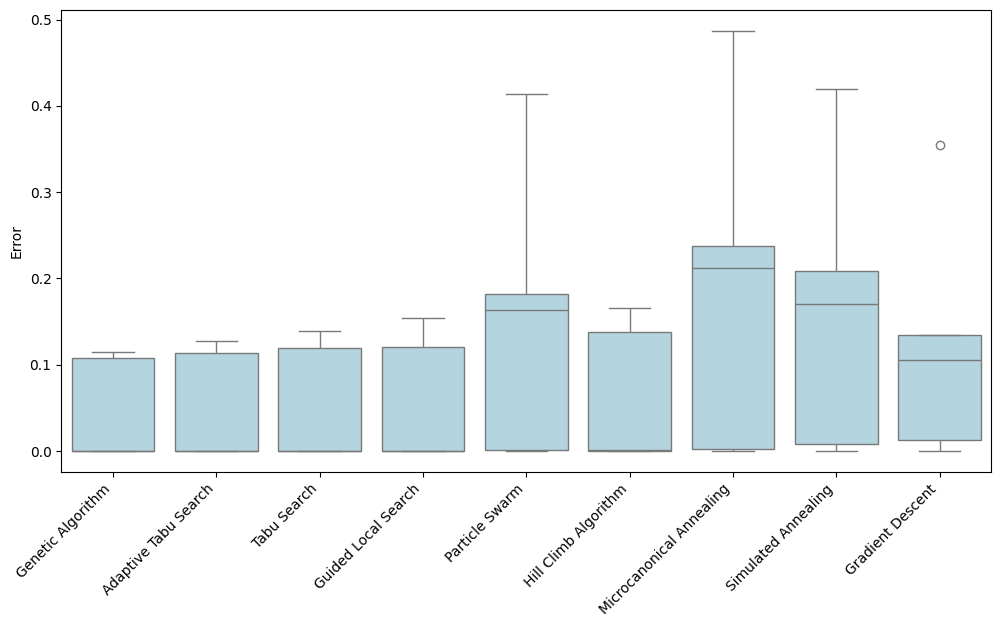

In [17]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

# Get the best test for each optimizer and target expression (without)
grouped = results_df.groupby(['optimizer', 'target_expression'])
best_rows = []
for (optimizer, target), group in grouped:
    best_error_idx = group['error'].idxmin()
    best_row = group.loc[best_error_idx]

    best_rows.append({
        'optimizer': optimizer,
        'target_expression': target,
        'prediction': best_row['prediction'],
        'error': best_row['error'],
    })

results_df =  pd.DataFrame(best_rows)
results_df = results_df.sort_values(by='error')

# Plotting the error for each optimizer
plt.figure(figsize=(12, 6))
sns.boxplot(x='optimizer', y='error', data=results_df, color='lightblue',
            order=results_df['optimizer'].unique())
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Error')
plt.show()


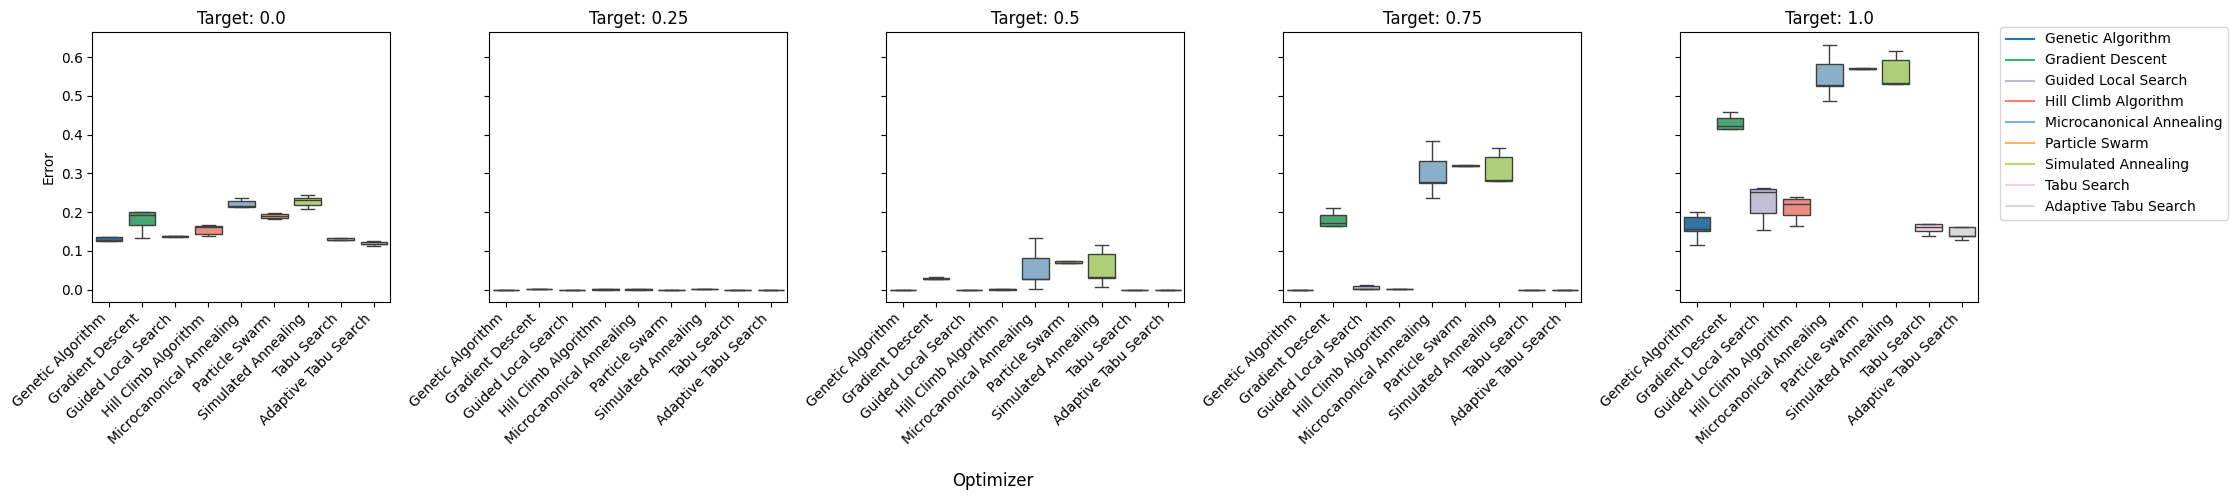

In [18]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Define consistent color map per optimizer
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='error',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Error')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

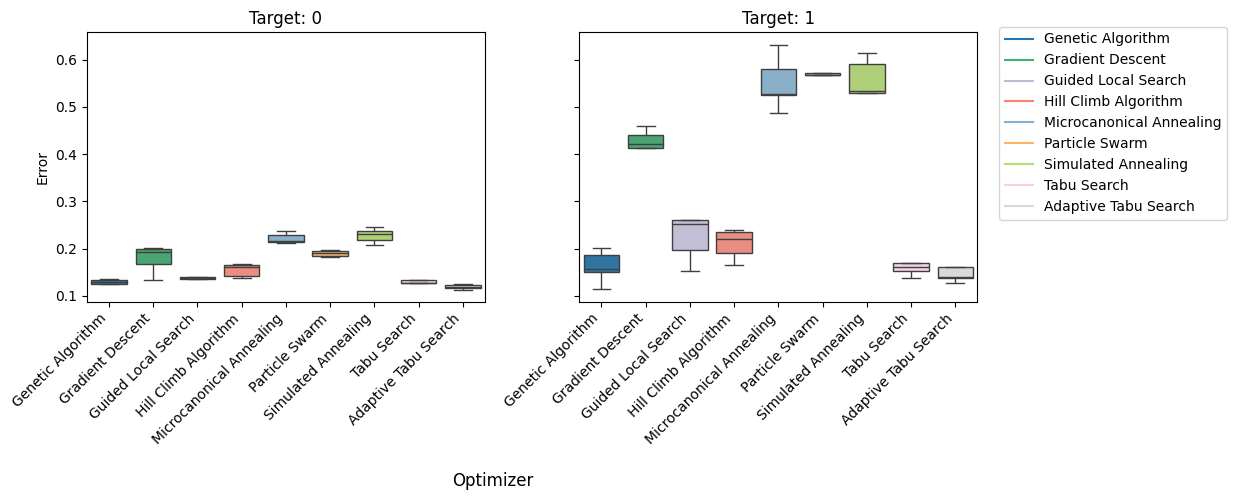

In [19]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = [0, 1]
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Define consistent color map per optimizer
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='error',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Error')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

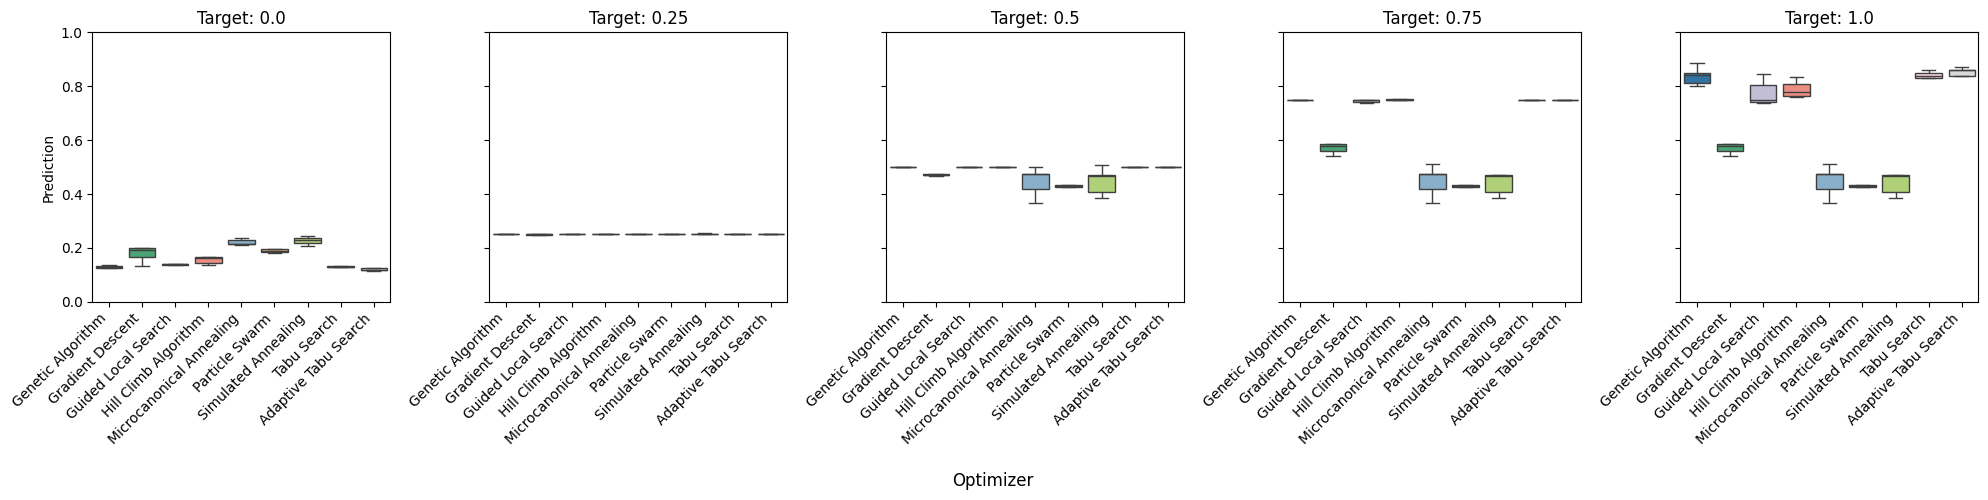

In [20]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Define consistent color map per optimizer
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='prediction',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Prediction')
    axes[i].set_ylim(0, 1)
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

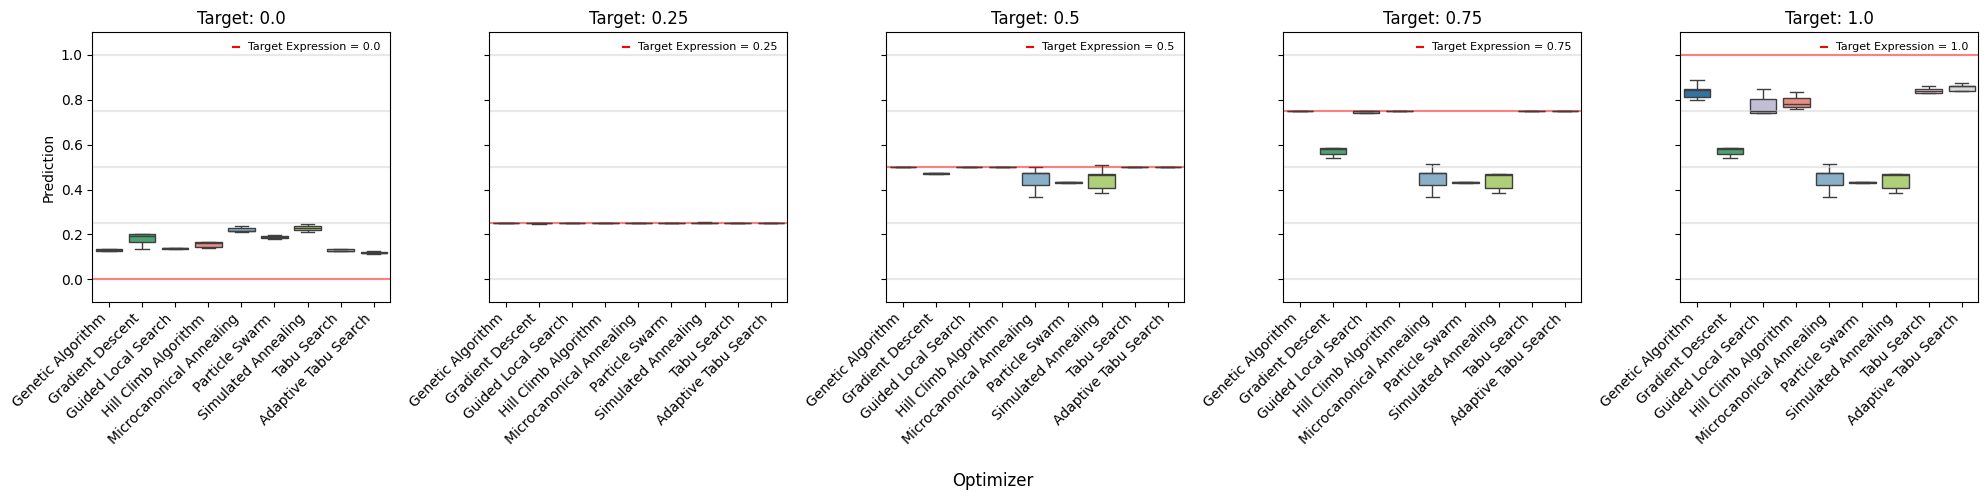

In [21]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Define consistent color map per optimizer
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='prediction',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Prediction')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

    # plot target expression lines
    for each in target_expressions:
        color = 'lightgrey' if each != target_expr else 'red'
        label = f'Target Expression = {each}' if each == target_expr else None
        axes[i].axhline(y=each, color=color, linestyle='-', alpha=0.5, label=label)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='red', label=f'Target Expression = {target_expr}')]
    axes[i].legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    axes[i].set_ylim(-0.1, 1.1)
    

fig.supxlabel("Optimizer")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
# fig.legend(
#     handles=handles,
#     labels=labels,
#     loc='upper left',
#     bbox_to_anchor=(1, 0.95),
#     bbox_transform=fig.transFigure
# )

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

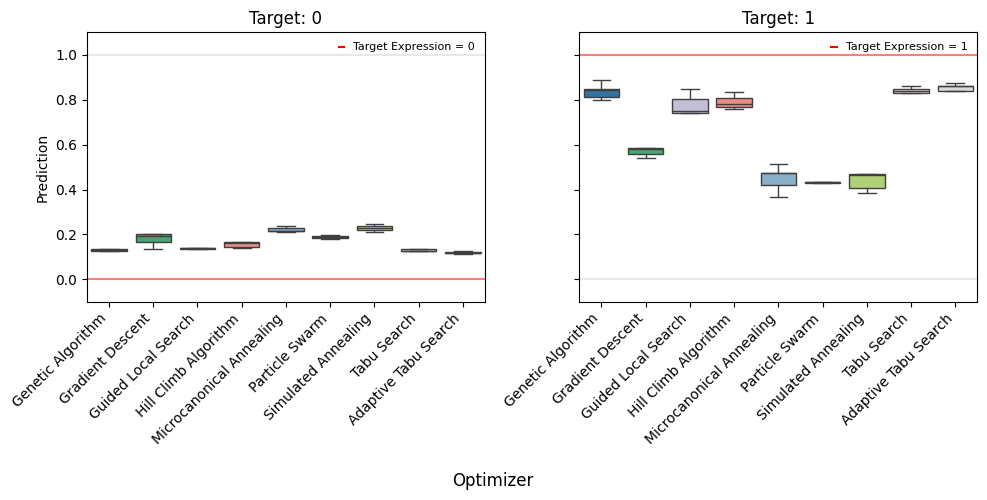

In [22]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = [0, 1]
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Define consistent color map per optimizer
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='prediction',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Prediction')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

    # plot target expression lines
    for each in target_expressions:
        color = 'lightgrey' if each != target_expr else 'red'
        label = f'Target Expression = {each}' if each == target_expr else None
        axes[i].axhline(y=each, color=color, linestyle='-', alpha=0.5, label=label)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='red', label=f'Target Expression = {target_expr}')]
    axes[i].legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    axes[i].set_ylim(-0.1, 1.1)
    

fig.supxlabel("Optimizer")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
# fig.legend(
#     handles=handles,
#     labels=labels,
#     loc='upper left',
#     bbox_to_anchor=(1, 0.95),
#     bbox_transform=fig.transFigure
# )

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### Hamming Distance
---

In [23]:
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))


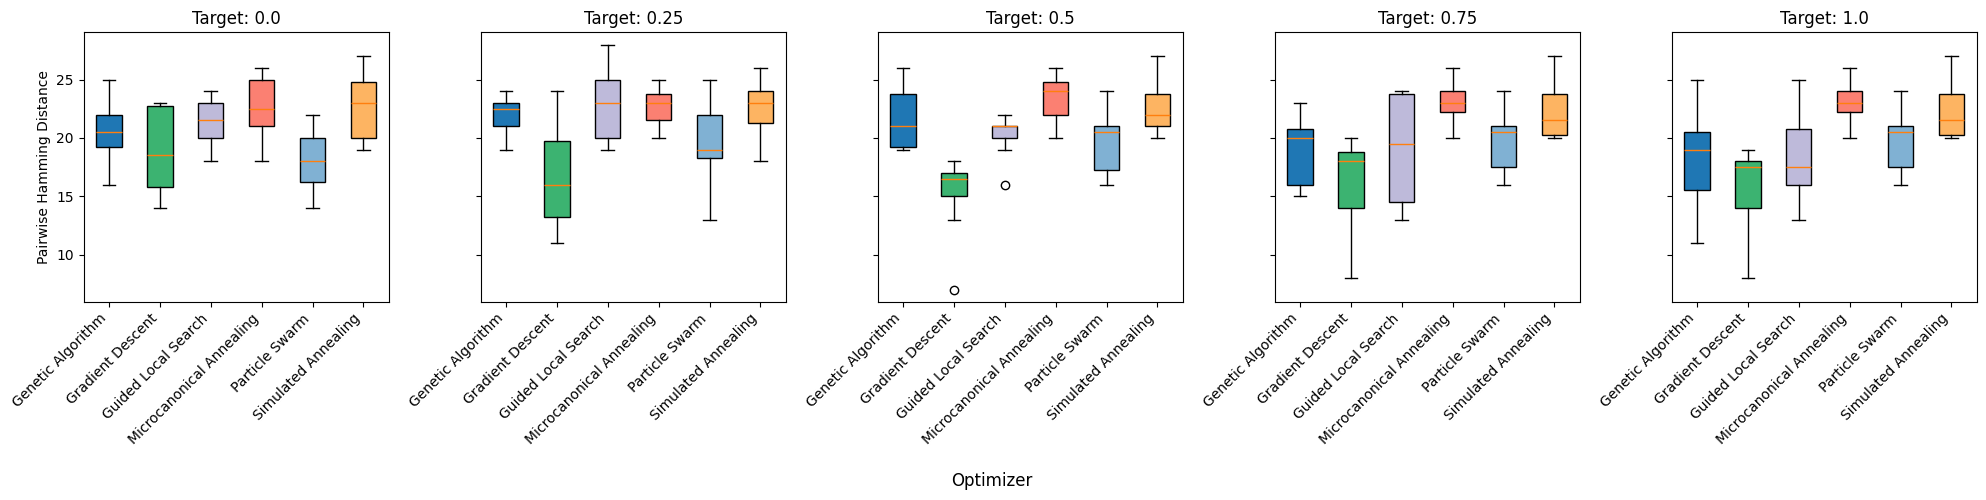

In [24]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

# get optimizer names, but exclude deterministic optimizers
optimizer_names = results_df['optimizer'].unique()
optimizer_names = [name for name in optimizer_names if name not in ['Hill Climb Algorithm', 'Tabu Search', 'Adaptive Tabu Search']]

# Bold, muted colors for optimizers
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot the boxplot distribution of pairwise hamming distances for every optimizer and target expression combination
for i, target in enumerate(target_expressions):
    ax = axes[i]
    target_df = results_df[results_df['target_expression'] == target]
    
    data_to_plot = []
    
    for opt in optimizer_names:
        opt_df = target_df[target_df['optimizer'] == opt]
        sequences = opt_df['sequence'].values
        hamming_distances = []
        
        for seq1, seq2 in combinations(sequences, 2):
            hamming_distances.append(hamming_distance(seq1, seq2))
        
        data_to_plot.append(hamming_distances)
    
    # Boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes
    for patch, opt in zip(bp['boxes'], optimizer_names):
        patch.set_facecolor(color_map[opt])
    
    ax.set_title(f'Target: {target}')
    ax.set_xlabel('')
    ax.set_xticks(range(1, len(optimizer_names) + 1))
    ax.set_xticklabels(optimizer_names, rotation=45, ha='right')

    if i == 0:
        ax.set_ylabel('Pairwise Hamming Distance')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


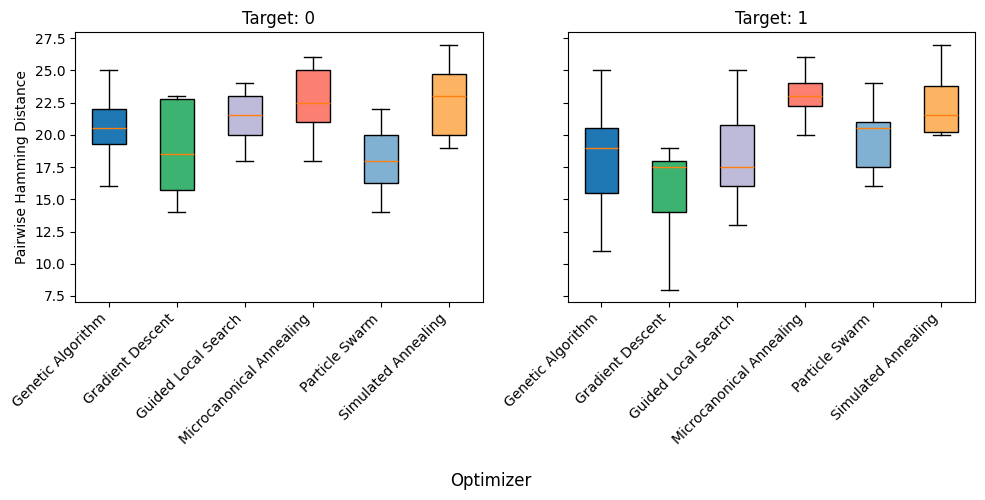

In [25]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = [0, 1]

# Grid layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

# get optimizer names, but exclude deterministic optimizers
optimizer_names = results_df['optimizer'].unique()
optimizer_names = [name for name in optimizer_names if name not in ['Hill Climb Algorithm', 'Tabu Search', 'Adaptive Tabu Search']]

# Bold, muted colors for optimizers
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

# Plot the boxplot distribution of pairwise hamming distances for every optimizer and target expression combination
for i, target in enumerate(target_expressions):
    ax = axes[i]
    target_df = results_df[results_df['target_expression'] == target]
    
    data_to_plot = []
    
    for opt in optimizer_names:
        opt_df = target_df[target_df['optimizer'] == opt]
        sequences = opt_df['sequence'].values
        hamming_distances = []
        
        for seq1, seq2 in combinations(sequences, 2):
            hamming_distances.append(hamming_distance(seq1, seq2))
        
        data_to_plot.append(hamming_distances)
    
    # Boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes
    for patch, opt in zip(bp['boxes'], optimizer_names):
        patch.set_facecolor(color_map[opt])
    
    ax.set_title(f'Target: {target}')
    ax.set_xlabel('')
    ax.set_xticks(range(1, len(optimizer_names) + 1))
    ax.set_xticklabels(optimizer_names, rotation=45, ha='right')

    if i == 0:
        ax.set_ylabel('Pairwise Hamming Distance')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


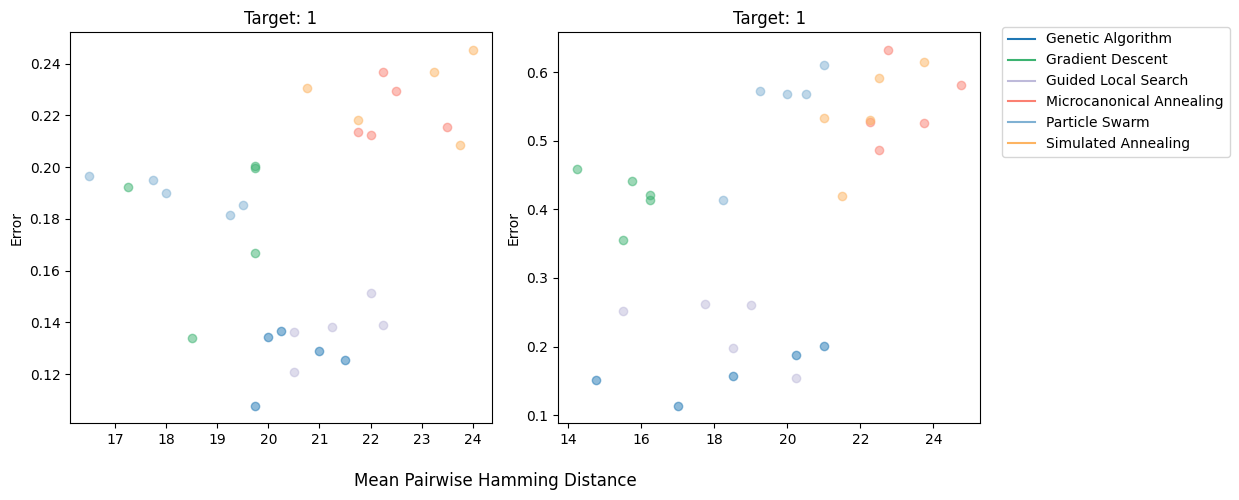

In [26]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = [0, 1]

# Grid layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

# get optimizer names, but exclude deterministic optimizers
optimizer_names = results_df['optimizer'].unique()
optimizer_names = [name for name in optimizer_names if name not in ['Hill Climb Algorithm', 'Tabu Search', 'Adaptive Tabu Search']]

# Bold, muted colors for optimizers
bold_optimizers = {
    'Genetic Algorithm': 'tab:blue',
    'Gradient Descent': 'mediumseagreen'
}
muted_optimizers = {name: plt.cm.Set3(i) for i, name in enumerate(optimizer_names) if name not in bold_optimizers}
color_map = {**bold_optimizers, **muted_optimizers}

for i, target in enumerate(target_expressions):
    ax = axes[i]
    target_df = results_df[results_df['target_expression'] == target]
    
    for opt in optimizer_names:
        opt_df = target_df[target_df['optimizer'] == opt]
        sequences = opt_df['sequence'].values
        errors = opt_df['error'].values
        hamming_distances = {}
        
        for i, seq1 in enumerate(sequences):
            for seq2 in sequences:
                if seq1 != seq2:
                    dist = hamming_distance(seq1, seq2)
                    if seq1 not in hamming_distances:
                        hamming_distances[seq1] = []
                    hamming_distances[seq1].append(dist)
            
            mean_distance = np.mean(hamming_distances[seq1])

            # plot a scatter point for each sequence's mean  hamming distance and error
            ax.scatter(mean_distance, errors[i], color=color_map[opt], alpha=0.5)

    ax.set_title(f'Target: {target_expr}')
    ax.set_ylabel('Error')
            
    if i == 0:
        ax.set_ylabel('Pairwise Hamming Distance')

fig.supxlabel("Mean Pairwise Hamming Distance")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [27]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

results_df = results_df[results_df['target_expression'] == 0]

optimizer_names = ['Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm', 'Gradient Descent']

for optimizer1 in optimizer_names:
    for optimizer2 in optimizer_names:
        if optimizer1 == optimizer2:
            continue
        seq1 = results_df[results_df['optimizer'] == optimizer1]['sequence'].values[0]
        seq2 = results_df[results_df['optimizer'] == optimizer2]['sequence'].values[0]
        distance = hamming_distance(seq1, seq2)
        print(f'{optimizer1} | {optimizer2} = {distance}')
    print()

Tabu Search | Guided Local Search = 19
Tabu Search | Hill Climb Algorithm = 16
Tabu Search | Gradient Descent = 19

Guided Local Search | Tabu Search = 19
Guided Local Search | Hill Climb Algorithm = 21
Guided Local Search | Gradient Descent = 16

Hill Climb Algorithm | Tabu Search = 16
Hill Climb Algorithm | Guided Local Search = 21
Hill Climb Algorithm | Gradient Descent = 18

Gradient Descent | Tabu Search = 19
Gradient Descent | Guided Local Search = 16
Gradient Descent | Hill Climb Algorithm = 18



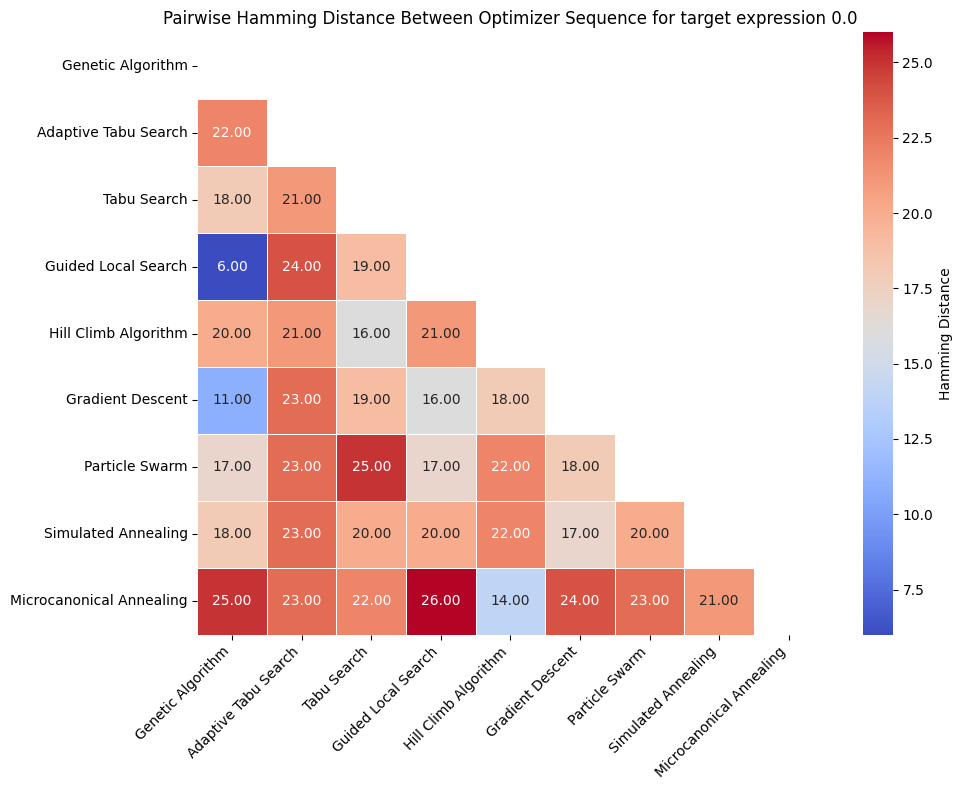

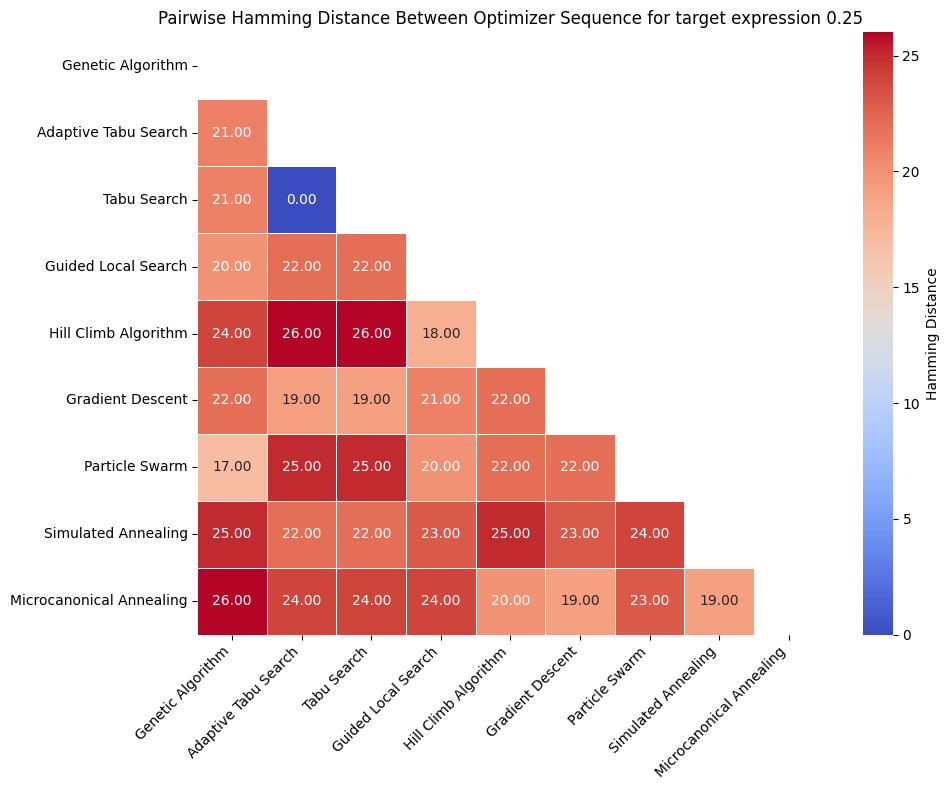

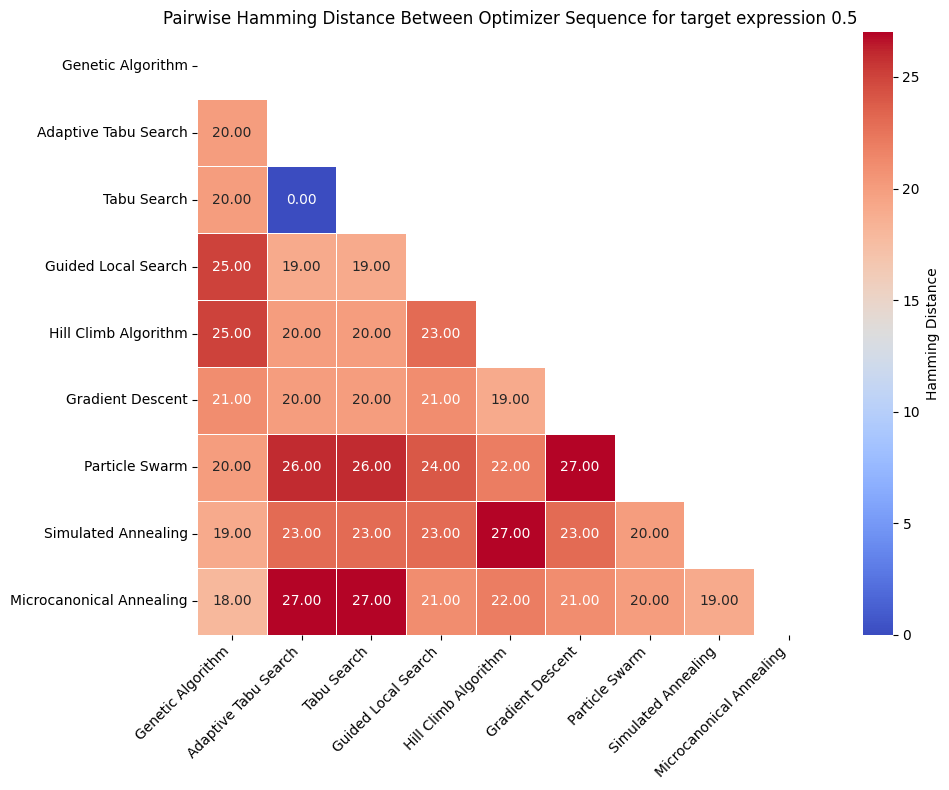

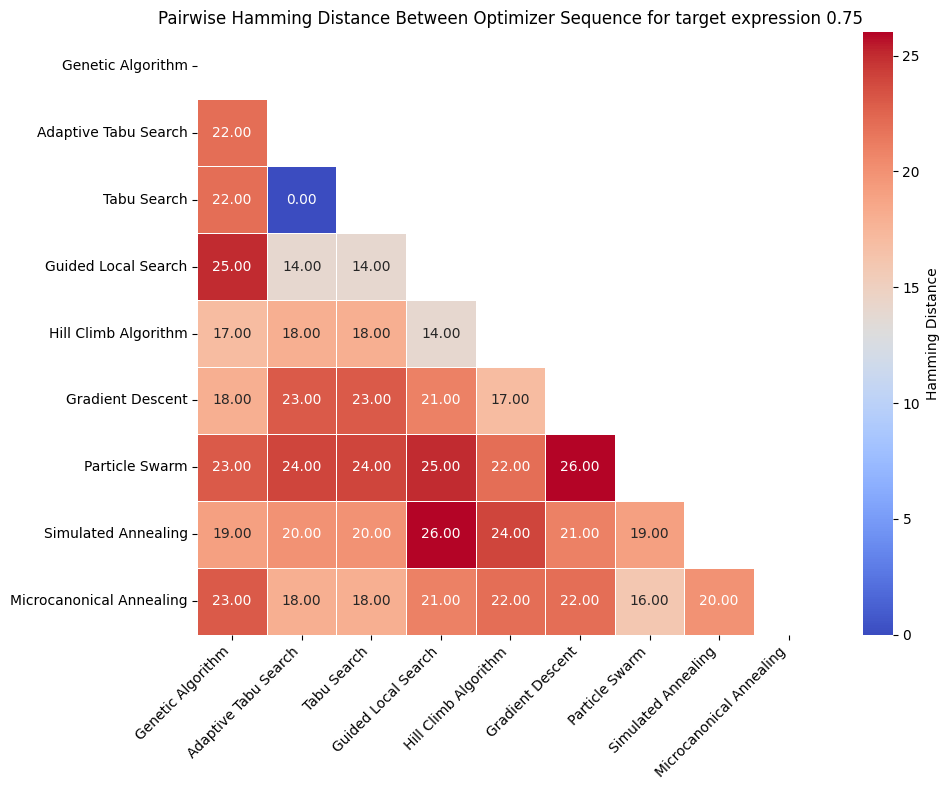

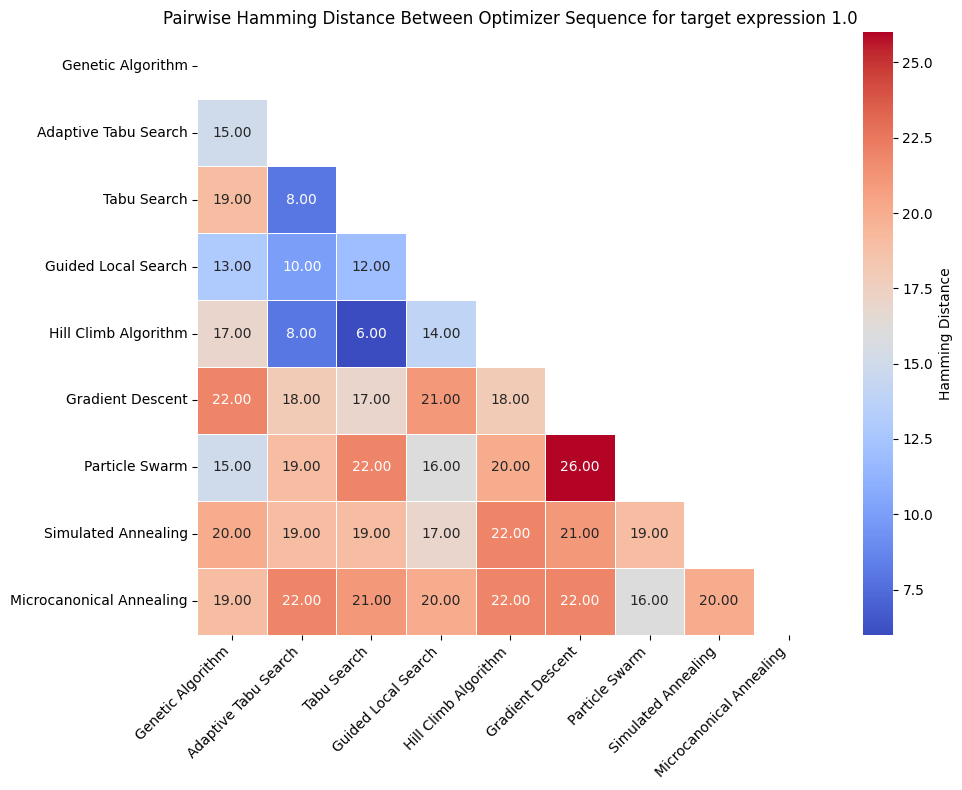

In [28]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

global_error_means = results_df.groupby('optimizer')['error'].mean()
global_sorted_optimizers = global_error_means.sort_values().index.tolist()

target_expressions = results_df['target_expression'].unique()
hamming_dfs = {}

for target in target_expressions:
    target_df = results_df[results_df['target_expression'] == target]

    error_means = target_df.groupby('optimizer')['error'].mean()
    sorted_optimizers = error_means.sort_values().index.tolist()

    hamming_matrix = pd.DataFrame(index=global_sorted_optimizers, columns=global_sorted_optimizers, dtype=float)

    for opt1, opt2 in product(global_sorted_optimizers, repeat=2):
        if opt1 == opt2:
            hamming_matrix.loc[opt1, opt2] = 0
        else:
            seq1 = target_df[target_df['optimizer'] == opt1]['sequence'].values[0]
            seq2 = target_df[target_df['optimizer'] == opt2]['sequence'].values[0]
            distance = hamming_distance(seq1, seq2)
            hamming_matrix.loc[opt1, opt2] = distance

    hamming_dfs[target] = hamming_matrix

for target, hamming_df in hamming_dfs.items():

    mask = np.triu(np.ones_like(hamming_df, dtype=bool))

    plt.figure(figsize=(10, 8))

    sns.heatmap(
        hamming_df,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Hamming Distance'}
    )

    plt.title(f'Pairwise Hamming Distance Between Optimizer Sequence for target expression {target}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [29]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

# Get unique target expressions
target_expressions = results_df['target_expression'].unique()

# List of optimizers
optimizer_names = ['Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm', 'Gradient Descent']

# Dictionary to store DataFrames for each target_expression
hamming_dfs = {}

for target in target_expressions:
    target_df = results_df[results_df['target_expression'] == target]

    # Initialize a DataFrame with optimizers as both rows and columns
    hamming_matrix = pd.DataFrame(index=optimizer_names, columns=optimizer_names, dtype=float)

    for opt1, opt2 in product(optimizer_names, repeat=2):
        if opt1 == opt2:
            hamming_matrix.loc[opt1, opt2] = 0
        else:
            seq1 = target_df[target_df['optimizer'] == opt1]['sequence'].values[0]
            seq2 = target_df[target_df['optimizer'] == opt2]['sequence'].values[0]
            distance = hamming_distance(seq1, seq2)
            hamming_matrix.loc[opt1, opt2] = distance

    # Sort the matrix by the sum of distances in rows
    hamming_matrix = hamming_matrix.loc[hamming_matrix.sum(axis=1).sort_values().index]
    hamming_matrix = hamming_matrix[hamming_matrix.sum().sort_values().index]
    hamming_dfs[target] = hamming_matrix

hamming_dfs[0]


Gradient Descent  Tabu Search  Hill Climb Algorithm  \
Gradient Descent                   0.0         19.0                  18.0   
Tabu Search                       19.0          0.0                  16.0   
Hill Climb Algorithm              18.0         16.0                   0.0   
Guided Local Search               16.0         19.0                  21.0   

                      Guided Local Search  
Gradient Descent                     16.0  
Tabu Search                          19.0  
Hill Climb Algorithm                 21.0  
Guided Local Search                   0.0

### Tables
---

In [30]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

results_df = best_tests(results_df)

min_error_preds = results_df.drop_duplicates(subset=['optimizer', 'target_expression'], keep='first')

pivot_df = min_error_preds.pivot(
    index='optimizer',
    columns='target_expression',
    values='prediction'
)

pivot_df.columns = [f'prediction (target_expression={col})' for col in pivot_df.columns]
pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
pivot_df = pivot_df.reset_index()

pivot_df


optimizer  prediction (target_expression=0.0)  \
0         Genetic Algorithm                            0.107874   
1      Adaptive Tabu Search                            0.113416   
2               Tabu Search                            0.118780   
3       Guided Local Search                            0.120862   
4      Hill Climb Algorithm                            0.137827   
5          Gradient Descent                            0.134133   
6            Particle Swarm                            0.181424   
7       Simulated Annealing                            0.208723   
8  Microcanonical Annealing                            0.212349   

   prediction (target_expression=0.25)  prediction (target_expression=0.5)  \
0                             0.249999                            0.500000   
1                             0.250000                            0.500001   
2                             0.250000                            0.500001   
3                             0.250002                            0.499996   
4                             0.250009                            0.500015   
5                             0.249784                            0.487831   
6                             0.250005                            0.499646   
7                             0.250161                            0.507794   
8                             0.250067                            0.501824   

   prediction (target_expression=0.75)  prediction (target_expression=1.0)  
0                             0.749995                            0.885947  
1                             0.750004                            0.873045  
2                             0.750004                            0.861419  
3                             0.750144                            0.846510  
4                             0.749663                            0.834812  
5                             0.644957                            0.644957  
6                             0.586647                            0.586647  
7                             0.580200                            0.580200  
8                             0.513064                            0.513064

In [31]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

results_df = best_tests(results_df)

min_error_preds = results_df.drop_duplicates(subset=['optimizer', 'target_expression'], keep='first')

pivot_df = min_error_preds.pivot(
    index='optimizer',
    columns='target_expression',
    values='error'
)

pivot_df.columns = [f'error (target_expression={col})' for col in pivot_df.columns]
pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=True)
pivot_df = pivot_df.reset_index()
pivot_df = pivot_df.round(6)

pivot_df


optimizer  error (target_expression=0.0)  \
0         Genetic Algorithm                       0.107874   
1      Adaptive Tabu Search                       0.113416   
2               Tabu Search                       0.118780   
3       Guided Local Search                       0.120862   
4      Hill Climb Algorithm                       0.137827   
5          Gradient Descent                       0.134133   
6            Particle Swarm                       0.181424   
7       Simulated Annealing                       0.208723   
8  Microcanonical Annealing                       0.212349   

   error (target_expression=0.25)  error (target_expression=0.5)  \
0                        0.000001                       0.000000   
1                        0.000000                       0.000001   
2                        0.000000                       0.000001   
3                        0.000002                       0.000004   
4                        0.000009                       0.000015   
5                        0.000216                       0.012169   
6                        0.000005                       0.000354   
7                        0.000161                       0.007794   
8                        0.000067                       0.001824   

   error (target_expression=0.75)  error (target_expression=1.0)  
0                        0.000005                       0.114053  
1                        0.000004                       0.126955  
2                        0.000004                       0.138581  
3                        0.000144                       0.153490  
4                        0.000337                       0.165188  
5                        0.105043                       0.355043  
6                        0.163353                       0.413353  
7                        0.169800                       0.419800  
8                        0.236936                       0.486936

In [32]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)[['optimizer', 'target_expression', 'prediction', 'error']]

results_df.head(None)

optimizer  target_expression  prediction         error
0       Adaptive Tabu Search               0.00    0.113416  1.134165e-01
1       Adaptive Tabu Search               0.25    0.250000  4.470348e-07
2       Adaptive Tabu Search               0.50    0.500001  5.364418e-07
3       Adaptive Tabu Search               0.75    0.750004  3.814697e-06
4       Adaptive Tabu Search               1.00    0.873045  1.269552e-01
5          Genetic Algorithm               0.00    0.107874  1.078736e-01
6          Genetic Algorithm               0.25    0.249999  5.960464e-07
7          Genetic Algorithm               0.50    0.500000  4.172325e-07
8          Genetic Algorithm               0.75    0.749995  5.006790e-06
9          Genetic Algorithm               1.00    0.885947  1.140527e-01
10          Gradient Descent               0.00    0.134133  1.341330e-01
11          Gradient Descent               0.25    0.249784  2.162904e-04
12          Gradient Descent               0.50    0.487831  1.216853e-02
13          Gradient Descent               0.75    0.644957  1.050426e-01
14          Gradient Descent               1.00    0.644957  3.550426e-01
15       Guided Local Search               0.00    0.120862  1.208617e-01
16       Guided Local Search               0.25    0.250002  1.579523e-06
17       Guided Local Search               0.50    0.499996  3.695488e-06
18       Guided Local Search               0.75    0.750144  1.436472e-04
19       Guided Local Search               1.00    0.846510  1.534902e-01
20      Hill Climb Algorithm               0.00    0.137827  1.378267e-01
21      Hill Climb Algorithm               0.25    0.250009  8.672476e-06
22      Hill Climb Algorithm               0.50    0.500015  1.549721e-05
23      Hill Climb Algorithm               0.75    0.749663  3.370047e-04
24      Hill Climb Algorithm               1.00    0.834812  1.651882e-01
25  Microcanonical Annealing               0.00    0.212349  2.123487e-01
26  Microcanonical Annealing               0.25    0.250067  6.735325e-05
27  Microcanonical Annealing               0.50    0.501824  1.824379e-03
28  Microcanonical Annealing               0.75    0.513064  2.369356e-01
29  Microcanonical Annealing               1.00    0.513064  4.869356e-01
30            Particle Swarm               0.00    0.181424  1.814236e-01
31            Particle Swarm               0.25    0.250005  4.857779e-06
32            Particle Swarm               0.50    0.499646  3.539324e-04
33            Particle Swarm               0.75    0.586647  1.633530e-01
34            Particle Swarm               1.00    0.586647  4.133530e-01
35       Simulated Annealing               0.00    0.208723  2.087227e-01
36       Simulated Annealing               0.25    0.250161  1.605153e-04
37       Simulated Annealing               0.50    0.507794  7.794023e-03
38       Simulated Annealing               0.75    0.580200  1.698000e-01
39       Simulated Annealing               1.00    0.580200  4.198000e-01
40               Tabu Search               0.00    0.118780  1.187801e-01
41               Tabu Search               0.25    0.250000  4.470348e-07
42               Tabu Search               0.50    0.500001  5.364418e-07
43               Tabu Search               0.75    0.750004  3.814697e-06
44               Tabu Search               1.00    0.861419  1.385807e-01

### Figures 
---

In [33]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

cmap = plt.get_cmap('turbo')
unique_optimizers = results_df['optimizer'].unique()
color_map = {desc: cmap(i / len(unique_optimizers)) for i, desc in enumerate(unique_optimizers)}

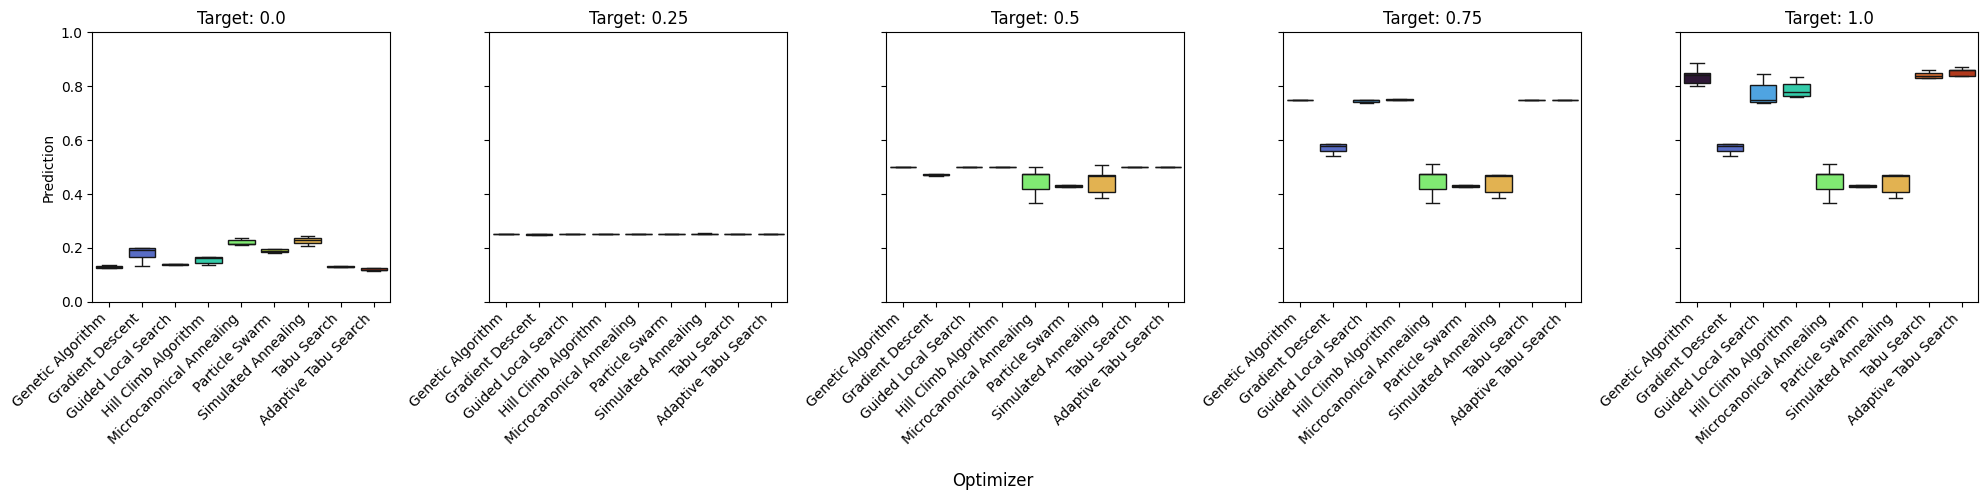

In [34]:
'''-----------------Figure S6-----------------'''

# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='prediction',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Prediction')
    axes[i].set_ylim(0, 1)
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

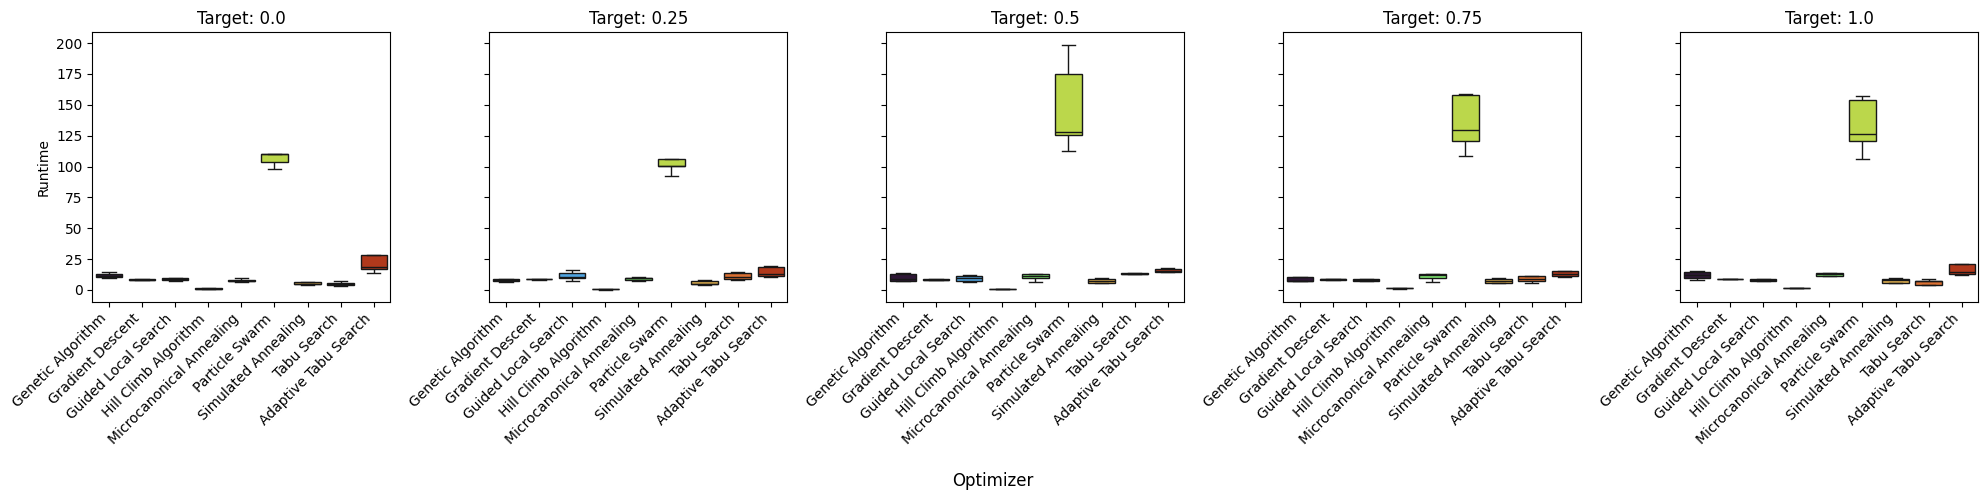

In [35]:
'''-----------------Figure S7-----------------'''

# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='runtime',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Runtime')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

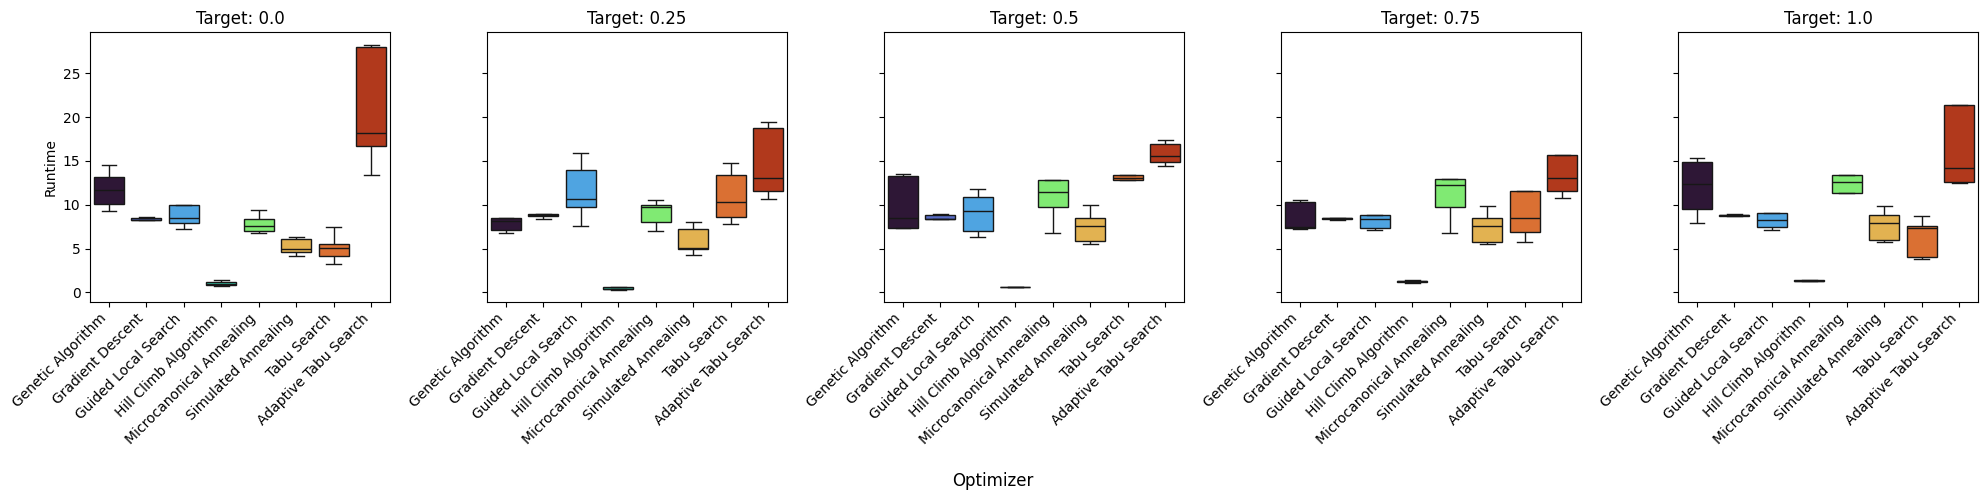

In [36]:
'''-----------------Figure S7-----------------'''

# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

results_df= results_df[results_df['optimizer'] != 'Particle Swarm']

target_expressions = results_df['target_expression'].unique()
num_targets = len(target_expressions)

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

optimizer_names = results_df['optimizer'].unique()

# Plot each target expression
for i, target_expr in enumerate(target_expressions):
    sns.boxplot(
        x='optimizer',
        y='runtime',
        hue='optimizer',
        data=results_df[results_df['target_expression'] == target_expr],
        ax=axes[i],
        palette=color_map,
        showfliers=False
    )
    axes[i].set_title(f'Target: {target_expr}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Runtime')
    axes[i].set_xticks(range(len(optimizer_names)))
    axes[i].set_xticklabels(optimizer_names, rotation=45, ha='right')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

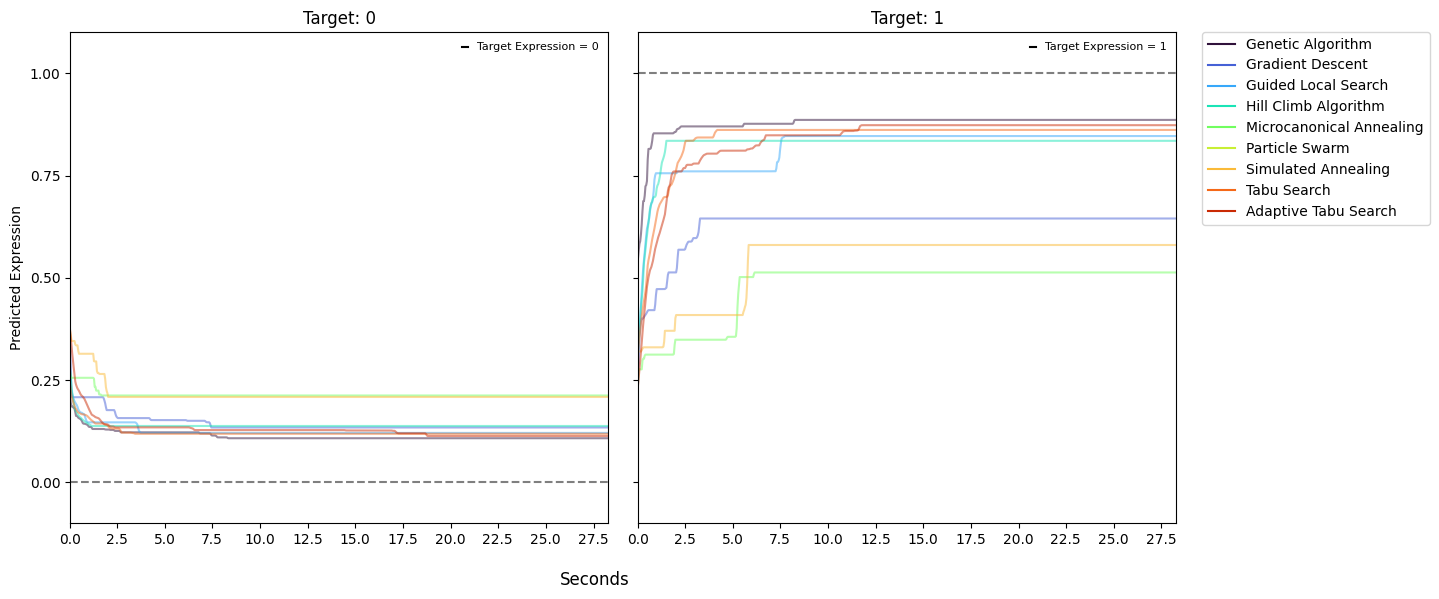

In [37]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()
max_runtime = results_df['runtime'].max()

results_df['prediction_history'] = results_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# ---------- Define The Optimizer Colors, Order, and Target Expressions ----------

optimizer_names = optimizers.keys()

target_expressions = [0, 1]

# -------------- Plot The Errors Over Time --------------

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes = axes.flatten()

for ax, target_expr in zip(axes, target_expressions):
    for optimizer in optimizer_names:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )


    # plot target expression lines
    ax.axhline(y=target_expr, color='black', linestyle='--', alpha=0.5)

    # add a legend, but only for the target_expressions line
    labels = [f'Target Expression = {each}' for each in target_expressions if each == target_expr]
    handles = [plt.Line2D([], [], color='black', label=f'Target Expression = {target_expr}')]
    ax.legend(handles=handles, loc='upper right', fontsize=8, frameon=False, handlelength=0.5, handleheight=0.5, labelspacing=0.5)

    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, max_length)
    ax.set_title(f'Target: {target_expr}')

for i in [0, 1]:
    # setting x-ticks to be in seconds
    tick_interval = 2.5
    tick_locs = np.arange(0, max_runtime, tick_interval)
    tick_indices = (tick_locs / max_runtime * max_length).astype(int)

    axes[i].set_xticks(tick_indices)
    axes[i].set_xticklabels([f"{x:.1f}" for x in tick_locs])

axes[0].set_yticks(np.arange(0, 1.1, 0.25))
axes[0].set_ylabel('Predicted Expression')

fig.supxlabel("Seconds")

# add the optimizer legend
labels = [opt for opt in optimizer_names]
handles = [plt.Line2D([], [], color=color_map[opt], label=opt) for opt in optimizer_names]
fig.legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    bbox_to_anchor=(1, 0.95),
    bbox_transform=fig.transFigure
)

plt.tight_layout()
# plt.savefig('Data/Figure 6b.png', dpi=300, bbox_inches='tight')
plt.show()


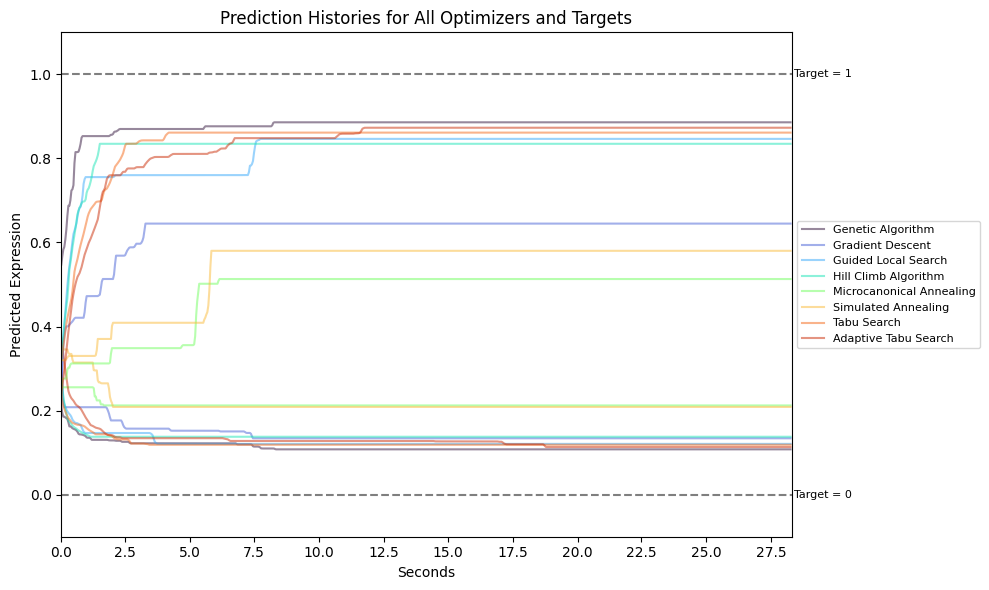

In [38]:
# -------------- Loading The Results --------------

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

# exclude particle swarm
results_df = results_df[results_df['optimizer'] != 'Particle Swarm']

# get the best test for each optimizer and target expression
results_df = best_tests(results_df)

results_df['prediction_history'] = results_df.apply(
    lambda row: calculate_best_prediction_history(row['prediction_history'], row['target_expression']), axis=1
)

results_df = dynamic_standardize_prediction_history(results_df)

# stretch the lengths of each prediction_history to the maximum length
max_length = results_df['prediction_history'].apply(len).max()
max_runtime = results_df['runtime'].max()

results_df['prediction_history'] = results_df['prediction_history'].apply(
    lambda preds: preds + [preds[-1]] * (max_length - len(preds))
)

# ---------- Define The Optimizer Colors, Order, and Target Expressions ----------

optimizer_names = optimizers.keys()

target_expressions = [0, 1]

# -------------- Combine All Lines Into One Plot --------------

fig, ax = plt.subplots(figsize=(10, 6))

for target_expr in target_expressions:
    for optimizer in optimizer_names:
        group = results_df[
            (results_df['target_expression'] == target_expr) &
            (results_df['optimizer'] == optimizer)
        ]
        if not group.empty:
            for idx, row in group.iterrows():
                ax.plot(
                    list(range(len(row['prediction_history']))),
                    row['prediction_history'],
                    color=color_map[optimizer],
                    alpha=0.5,
                    label=optimizer
                )

    # Add horizontal line for target expression
    ax.axhline(y=target_expr, color='black', linestyle='--', alpha=0.5)
    ax.text(max_length + 2, target_expr, f'Target = {target_expr}', va='center', fontsize=8)

ax.set_ylim(-0.1, 1.1)
ax.set_xlim(0, max_length)

# setting x-ticks to be in seconds
tick_interval = 2.5
tick_locs = np.arange(0, max_runtime, tick_interval)
tick_indices = (tick_locs / max_runtime * max_length).astype(int)

ax.set_xticks(tick_indices)
ax.set_xticklabels([f"{x:.1f}" for x in tick_locs])

ax.set_ylabel('Predicted Expression')
ax.set_xlabel('Seconds')
ax.set_title('Prediction Histories for All Optimizers and Targets')

# Deduplicated legend for optimizers
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique.values(), unique.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.tight_layout()
plt.show()


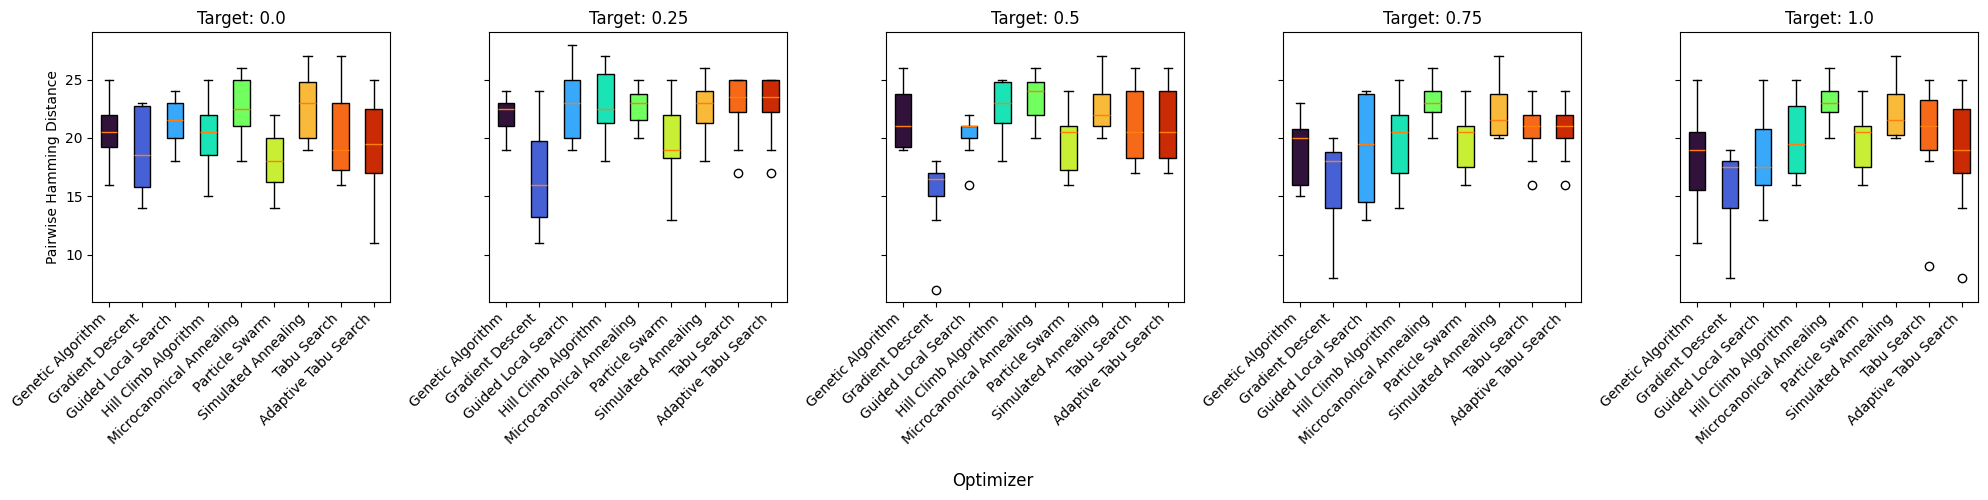

In [39]:
# Load data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

target_expressions = results_df['target_expression'].unique()

# Grid layout
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
axes = axes.flatten()

# get optimizer names, but exclude deterministic optimizers
optimizer_names = results_df['optimizer'].unique()

# Plot the boxplot distribution of pairwise hamming distances for every optimizer and target expression combination
for i, target in enumerate(target_expressions):
    ax = axes[i]
    target_df = results_df[results_df['target_expression'] == target]
    
    data_to_plot = []
    
    for opt in optimizer_names:
        opt_df = target_df[target_df['optimizer'] == opt]
        sequences = opt_df['sequence'].values
        hamming_distances = []
        
        for seq1, seq2 in combinations(sequences, 2):
            hamming_distances.append(hamming_distance(seq1, seq2))
        
        data_to_plot.append(hamming_distances)
    
    # Boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    # Color the boxes
    for patch, opt in zip(bp['boxes'], optimizer_names):
        patch.set_facecolor(color_map[opt])
    
    ax.set_title(f'Target: {target}')
    ax.set_xlabel('')
    ax.set_xticks(range(1, len(optimizer_names) + 1))
    ax.set_xticklabels(optimizer_names, rotation=45, ha='right')

    if i == 0:
        ax.set_ylabel('Pairwise Hamming Distance')

fig.supxlabel("Optimizer")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


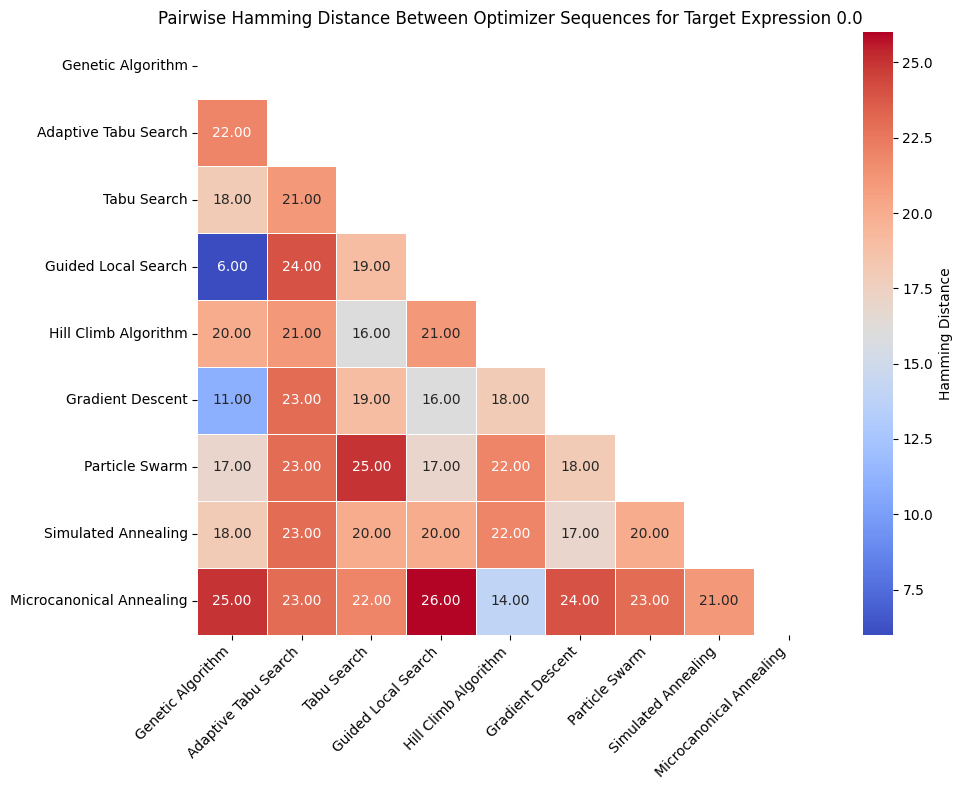

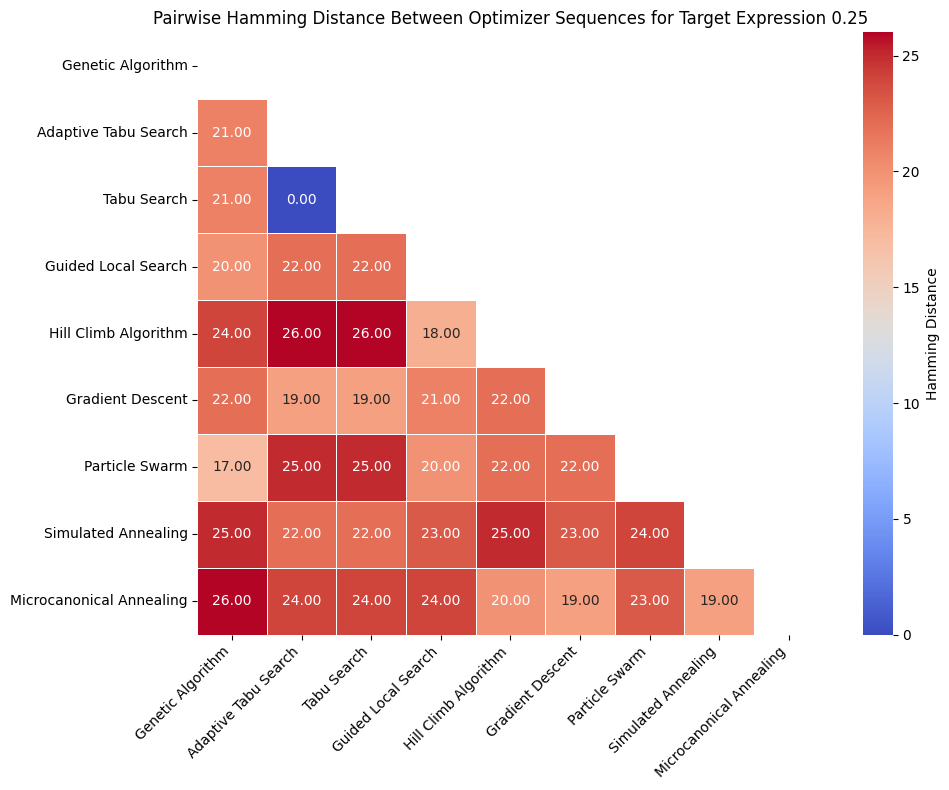

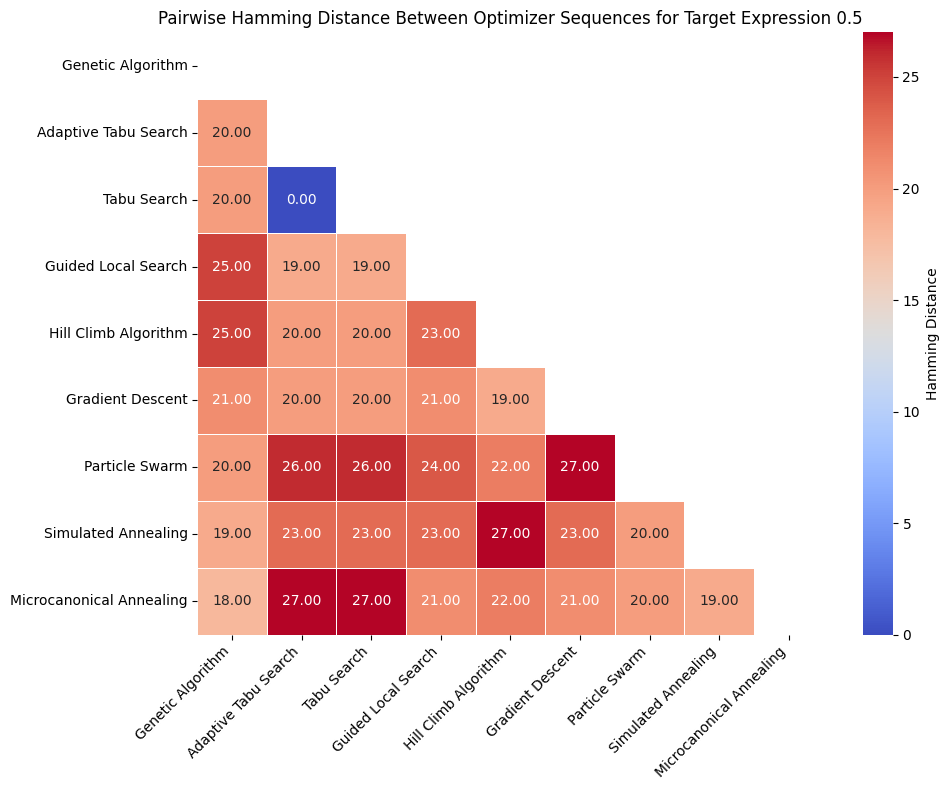

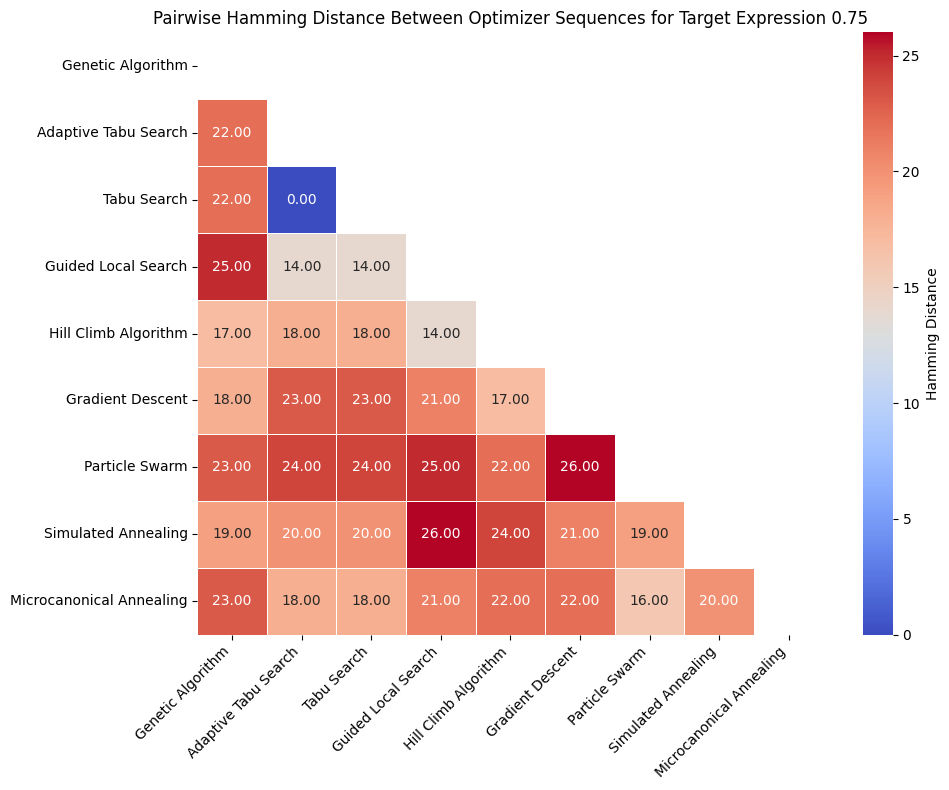

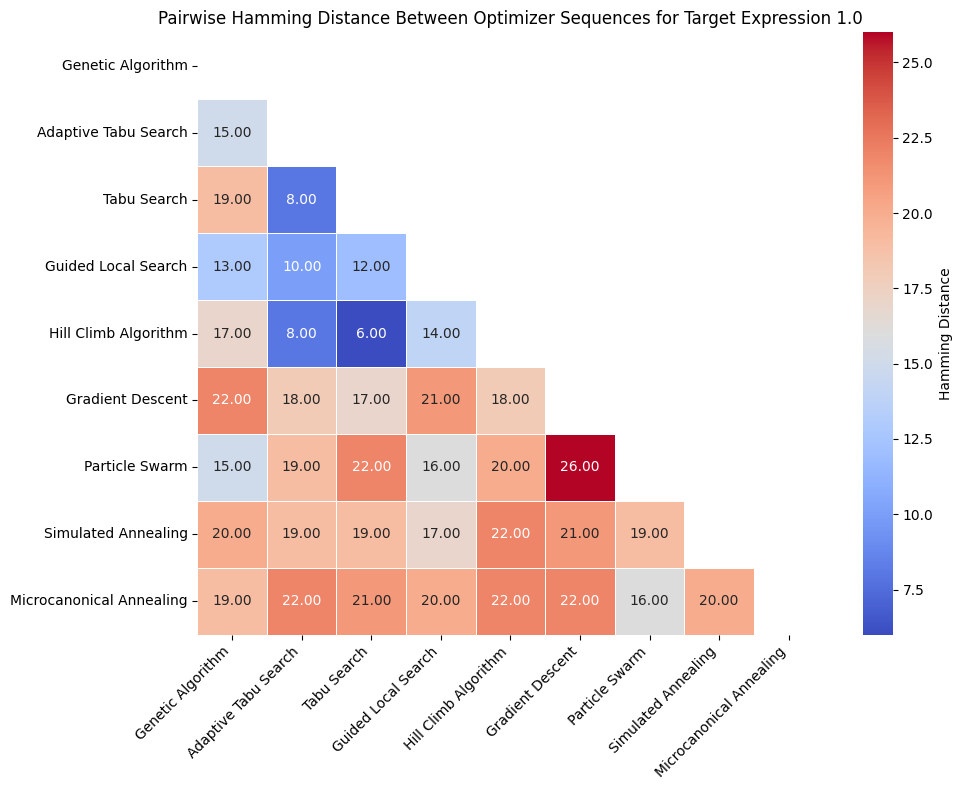

In [40]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

distance_data = {
    'Target Expression': [],
    'Average Hamming Distance': [],
    'Standard Deviation': [],
    'Median Hamming Distance': [],
    'Minimum Hamming Distance': [],
    'Maximum Hamming Distance': []
}

target_expressions = results_df['target_expression'].unique()

# Define global optimizer order based on overall mean error
global_error_means = results_df.groupby('optimizer')['error'].mean()
global_sorted_optimizers = global_error_means.sort_values().index.tolist()

hamming_dfs = {}

# calculate the hamming distance for each target expression
for target in target_expressions:
    target_df = results_df[results_df['target_expression'] == target]

    hamming_matrix = pd.DataFrame(index=global_sorted_optimizers, columns=global_sorted_optimizers, dtype=float)

    for opt1, opt2 in product(global_sorted_optimizers, repeat=2):
        if opt1 == opt2:
            hamming_matrix.loc[opt1, opt2] = 0
        else:
            try:
                seq1 = target_df[target_df['optimizer'] == opt1]['sequence'].values[0]
                seq2 = target_df[target_df['optimizer'] == opt2]['sequence'].values[0]
                distance = hamming_distance(seq1, seq2)
                hamming_matrix.loc[opt1, opt2] = distance
            except IndexError:
                hamming_matrix.loc[opt1, opt2] = np.nan

    hamming_dfs[target] = hamming_matrix

    # Calculate average and standard deviation of pairwise Hamming distances (excluding self-distances and NaNs)
    upper_triangle_values = hamming_matrix.where(np.triu(np.ones(hamming_matrix.shape), k=1).astype(bool)).values
    upper_triangle_values = upper_triangle_values[~np.isnan(upper_triangle_values)]

    distance_data['Target Expression'].append(target)
    distance_data['Average Hamming Distance'].append(np.mean(upper_triangle_values))
    distance_data['Standard Deviation'].append(np.std(upper_triangle_values))
    distance_data['Median Hamming Distance'].append(np.median(upper_triangle_values))
    distance_data['Minimum Hamming Distance'].append(np.min(upper_triangle_values))
    distance_data['Maximum Hamming Distance'].append(np.max(upper_triangle_values))

# Plot the Hamming distance matrices for each target expression
for target, hamming_df in hamming_dfs.items():
    mask = np.triu(np.ones_like(hamming_df, dtype=bool))

    plt.figure(figsize=(10, 8))

    sns.heatmap(
        hamming_df,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Hamming Distance'}
    )

    plt.title(f'Pairwise Hamming Distance Between Optimizer Sequences for Target Expression {target}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [41]:
distance_df = pd.DataFrame(distance_data)
distance_df.head()

Target Expression  Average Hamming Distance  Standard Deviation  \
0               0.00                 19.861111            3.987151   
1               0.25                 21.583333            4.335737   
2               0.50                 21.388889            4.504799   
3               0.75                 19.972222            4.693294   
4               1.00                 17.638889            4.466871   

   Median Hamming Distance  Minimum Hamming Distance  Maximum Hamming Distance  
0                     20.5                       6.0                      26.0  
1                     22.0                       0.0                      26.0  
2                     21.0                       0.0                      27.0  
3                     21.0                       0.0                      26.0  
4                     19.0                       6.0                      26.0

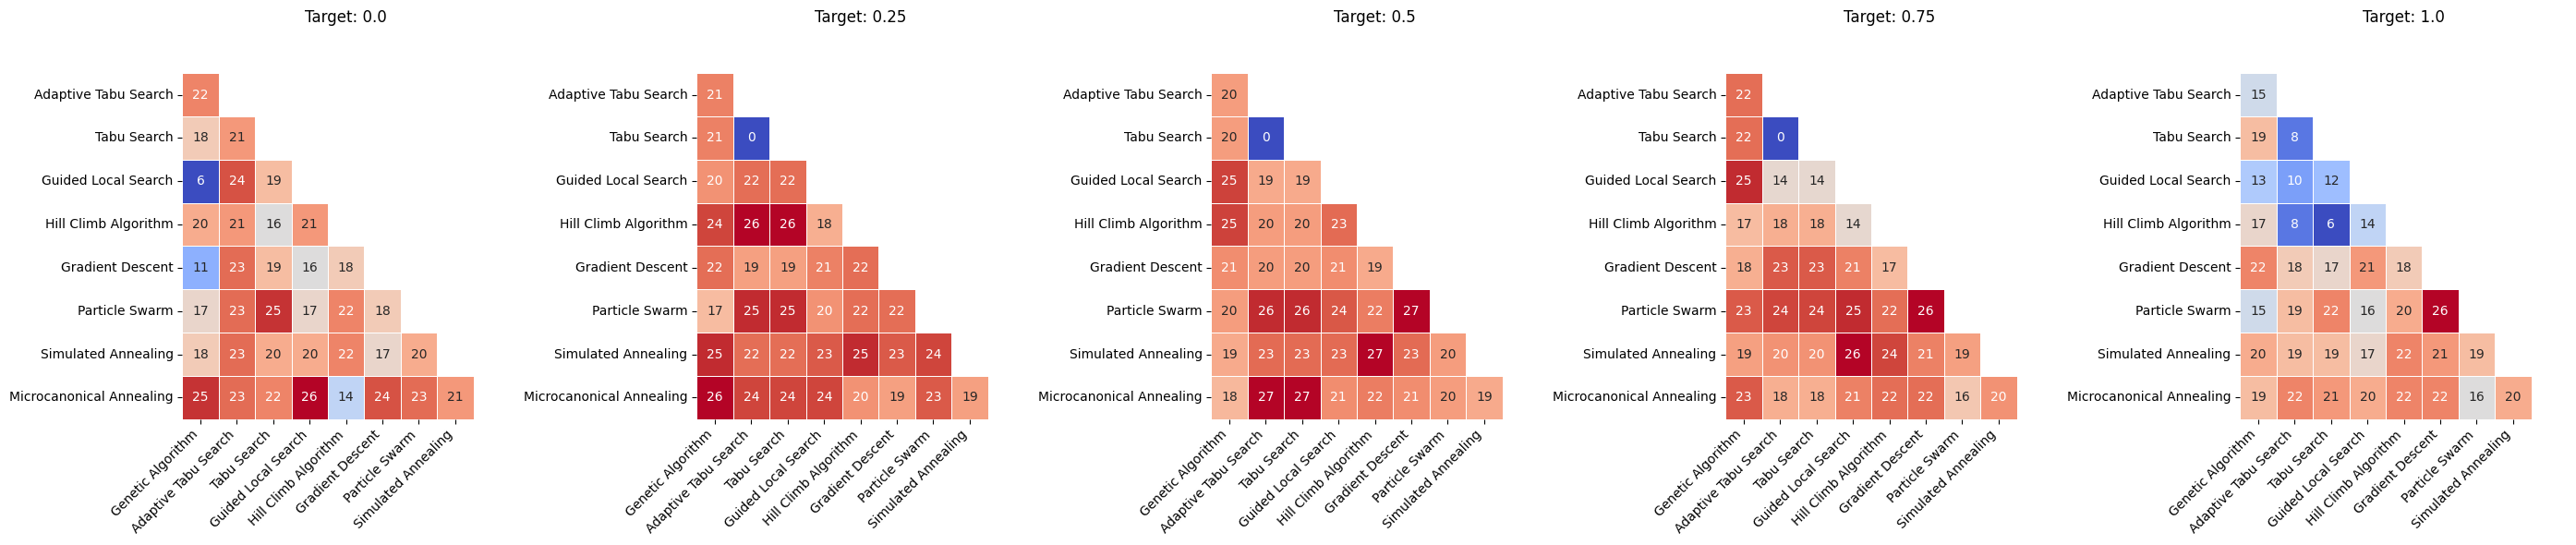

In [42]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

target_expressions = results_df['target_expression'].unique()

# Define global optimizer order based on overall mean error
global_error_means = results_df.groupby('optimizer')['error'].mean()
global_sorted_optimizers = global_error_means.sort_values().index.tolist()

hamming_dfs = {}

# calculate the hamming distance for each target expression
for target in target_expressions:
    target_df = results_df[results_df['target_expression'] == target]

    hamming_matrix = pd.DataFrame(index=global_sorted_optimizers, columns=global_sorted_optimizers, dtype=float)

    for opt1, opt2 in product(global_sorted_optimizers, repeat=2):
        if opt1 == opt2:
            hamming_matrix.loc[opt1, opt2] = 0
        else:
            try:
                seq1 = target_df[target_df['optimizer'] == opt1]['sequence'].values[0]
                seq2 = target_df[target_df['optimizer'] == opt2]['sequence'].values[0]
                distance = hamming_distance(seq1, seq2)
                hamming_matrix.loc[opt1, opt2] = distance
            except IndexError:
                hamming_matrix.loc[opt1, opt2] = np.nan

    hamming_dfs[target] = hamming_matrix

fig, axes = plt.subplots(1, 5, figsize=(28, 6), squeeze=False)

for i, (target, hamming_df) in enumerate(hamming_dfs.items()):
    mask = np.triu(np.ones_like(hamming_df, dtype=bool))

    ax = axes[0, i]
    sns.heatmap(
        hamming_df,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        linewidths=.5,
        cbar=False,
        ax=ax
    )

    # Remove the last x-tick label since it's masked
    xticks = ax.get_xticks()
    xticklabels = ax.get_xticklabels()
    ax.set_xticks(xticks[:-1])
    ax.set_xticklabels([label.get_text() for label in xticklabels[:-1]], rotation=45, ha='right')

    # Remove the first y-tick label since it's masked
    yticks = ax.get_yticks()
    yticklabels = ax.get_yticklabels()
    ax.set_yticks(yticks[1:])
    ax.set_yticklabels([label.get_text() for label in yticklabels[1:]])

    ax.set_title(f'Target: {target}')

plt.tight_layout()
plt.show()


In [107]:
def highlight_promoters(s, min_shared=5):
    targets = {
        "TTGACA": "\033[91m",  # Red
        "TATAAT": "\033[92m"   # Green
    }

    # Create a list to store color codes for each character
    color_map = [("", c) for c in s]

    for i in range(len(s)):
        for target, color in targets.items():
            t_len = len(target)
            if i + t_len <= len(s):
                window = s[i:i + t_len]
                match_positions = [j for j in range(t_len) if window[j] == target[j]]
                if len(match_positions) >= min_shared:
                    for j in match_positions:
                        idx = i + j
                        if color_map[idx][0] == "":
                            color_map[idx] = (color, color_map[idx][1])

    # Build the result string with coloring
    result = ""
    for color, char in color_map:
        if color:
            result += f"{color}{char}\033[0m"
        else:
            result += char

    return result

# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

results_df = results_df[results_df['target_expression'] == 1]

optimizer_names = ['Genetic Algorithm', 'Adaptive Tabu Search', 'Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm']
filtered_df = results_df[results_df['optimizer'].isin(optimizer_names)]

for sequence, optimizer in zip(filtered_df['sequence'], filtered_df['optimizer']):
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, optimizer)


AATACTAGAGGTCTTCCGACTTGACAAAAATGGTAAATTTATTATACTATGTGTGGGCGGGAAGACAACTAGGGG Adaptive Tabu Search
AATACTAGAGGTCTTCCGACTTGACAACCGGGTTATATTCTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG Genetic Algorithm
AATACTAGAGGTCTTCCGACTTGACTTAAGGGGTATAATTGATATAATCTGTGTGGGCGGGAAGACAACTAGGGG Guided Local Search
AATACTAGAGGTCTTCCGACTTGACAAAACCTATTTTTTTATTATACTAGGTGTGGGCGGGAAGACAACTAGGGG Hill Climb Algorithm
AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTCTATTATTATATTATGTGTGGGCGGGAAGACAACTAGGGG Tabu Search


In [47]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

results_df = best_tests(results_df)

results_df = results_df[results_df['target_expression'] == 1]

optimizer_names = ['Adaptive Tabu Search', 'Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm']
filtered_df = results_df[results_df['optimizer'].isin(optimizer_names)]

reference_sequence = filtered_df['sequence'].iloc[0]
for i in range(20, 50):
    print('_' if all(seq[i] == reference_sequence[i] for seq in filtered_df['sequence']) else ' ', end='')
print()

for idx, row in filtered_df.iterrows():
    sequence = row['sequence']
    optimizer = row['optimizer']
    prediction = row['prediction']
    print(sequence[20:50], optimizer)

print('\n---Including GA---\n')

optimizer_names = ['Genetic Algorithm', 'Adaptive Tabu Search', 'Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm']
filtered_df = results_df[results_df['optimizer'].isin(optimizer_names)]

reference_sequence = filtered_df['sequence'].iloc[0]
for i in range(20, 50):
    print('_' if all(seq[i] == reference_sequence[i] for seq in filtered_df['sequence']) else ' ', end='')
print()

for idx, row in filtered_df.iterrows():
    sequence = row['sequence']
    optimizer = row['optimizer']
    prediction = row['prediction']
    print(sequence[20:50], optimizer)

print('\n---All Sequences---\n')

optimizer_names = results_df['optimizer'].unique()
filtered_df = results_df[results_df['optimizer'].isin(optimizer_names)]

reference_sequence = filtered_df['sequence'].iloc[0]
for i in range(20, 50):
    print('_' if all(seq[i] == reference_sequence[i] for seq in filtered_df['sequence']) else ' ', end='')
print()

for idx, row in filtered_df.iterrows():
    sequence = row['sequence']
    optimizer = row['optimizer']
    prediction = row['prediction']
    print(sequence[20:50], optimizer)

_____  __    _    __  ____ _  
TTGACAAAAATGGTAAATTTATTATACTAT Adaptive Tabu Search
TTGACTTAAGGGGTATAATTGATATAATCT Guided Local Search
TTGACAAAACCTATTTTTTTATTATACTAG Hill Climb Algorithm
TTGACAAAACCAGTTCTATTATTATATTAT Tabu Search

---Including GA---

_____        _    _   __      
TTGACAAAAATGGTAAATTTATTATACTAT Adaptive Tabu Search
TTGACAACCGGGTTATATTCTATAATAATA Genetic Algorithm
TTGACTTAAGGGGTATAATTGATATAATCT Guided Local Search
TTGACAAAACCTATTTTTTTATTATACTAG Hill Climb Algorithm
TTGACAAAACCAGTTCTATTATTATATTAT Tabu Search

---All Sequences---

_                             
TTGACAAAAATGGTAAATTTATTATACTAT Adaptive Tabu Search
TTGACAACCGGGTTATATTCTATAATAATA Genetic Algorithm
TTTGCAATTAACCCCTTAAAATGTTAAAAT Gradient Descent
TTGACTTAAGGGGTATAATTGATATAATCT Guided Local Search
TTGACAAAACCTATTTTTTTATTATACTAG Hill Climb Algorithm
TGGCACGGTTAGTATATACTTATACAAATC Microcanonical Annealing
TGGACGGGGGGGACAGGTGTTATACTATGC Particle Swarm
TAACCTCGTATACTATCAGTTATCTTTTTT Simulated Annealing
TTGACAAAACCAGT

In [91]:
optimizer_names = ['Genetic Algorithm', 'Adaptive Tabu Search', 'Tabu Search', 'Guided Local Search', 'Hill Climb Algorithm']
filtered_df = results_df[results_df['optimizer'].isin(optimizer_names)]

filtered_df = filtered_df.sort_values(by='prediction', ascending=False)

for idx, row in filtered_df.iterrows():
    sequence = row['sequence']
    optimizer = row['optimizer']
    prediction = row['prediction']
    print(f'{prediction:.3f} {sequence[20:50]} {optimizer}')

0.886 TTGACAACCGGGTTATATTCTATAATAATA Genetic Algorithm
0.873 TTGACAAAAATGGTAAATTTATTATACTAT Adaptive Tabu Search
0.861 TTGACAAAACCAGTTCTATTATTATATTAT Tabu Search
0.847 TTGACTTAAGGGGTATAATTGATATAATCT Guided Local Search
0.835 TTGACAAAACCTATTTTTTTATTATACTAG Hill Climb Algorithm


In [48]:
from Generators.CNN import CNN

cnn = CNN(kwargs['cnn_model_path'])

up = 'AATACTAGAGGTCTTCCGAC'
down = 'GTGTGGGCGGGAAGACAACTAGGGG'

seq = [
    'TTGACAAAAATGGTAAATTTATTATACTAT', # Adaptive Tabu Search
    'TTGACAAAAATGGTAAATTTATTATAATAT', # Adaptive Tabu Search (-10)
    'TTGACAAAAATGGTAAATTTTATAATAAAT', # Adaptive Tabu Search (GA -10)
    'TTGACAAAACCAGTTCTATTATTATATTAT', # Tabu Search
    'TTGACAAAACCAGTTCTATTATTATAATAT', # Tabu Search (-10)
    'TTGACAAAACCAGTTCTATTTATAATAAAT', # Tabu Search (GA -10)
    'TTGACAAAACCTATTTTTTTATTATACTAG', # Hill Climb Algorithm
    'TTGACAAAACCTATTTTTTTATTATAATAG', # Hill Climb Algorithm (-10)
    'TTGACAAAACCTATTTTTTTTATAATAAAG', # Hill Climb Algorithm (GA -10)

]
seq = [up + s + down for s in seq]

seq = cnn.preprocess(seq)
pred = cnn.predict(seq)

# iterate ever other element in the list and print the prediction
for i in range(0, len(pred), 3):
    # print(pred[i] - pred[i + 1]) # origin vs -10
    print(pred[i] - pred[i + 2]) # origin vs GA -10

0.024309814
0.014202416
0.039753318


In [49]:
from Generators.CNN import CNN
from itertools import product

def generate_hybrids(A, B, up, down):

    differing_indices = [i for i in range(len(A)) if A[i] != B[i]]
    hybrids = []
    dist_to_As = []
    dist_to_Bs = []

    for choice in product([0, 1], repeat=len(differing_indices)):
        hybrid_chars = list(A)
        for idx, bit in zip(differing_indices, choice):
            hybrid_chars[idx] = B[idx] if bit == 1 else A[idx]

        hybrid = ''.join(hybrid_chars)
        dist_to_A = sum(1 for i in differing_indices if hybrid_chars[i] != A[i])
        dist_to_B = sum(1 for i in differing_indices if hybrid_chars[i] != B[i])

        hybrids.append(up + hybrid + down)
        dist_to_As.append(dist_to_A)
        dist_to_Bs.append(dist_to_B)

    return hybrids, dist_to_As, dist_to_Bs


cnn = CNN(kwargs['cnn_model_path'])

up = 'AATACTAGAGGTCTTCCGAC'
down = 'GTGTGGGCGGGAAGACAACTAGGGG'

GA = 'TTGACAACCGGGTTATATTCTATAATAATA'

sequences = {
    'Adaptive Tabu Search' : 'TTGACAAAAATGGTAAATTTATTATACTAT',
    'Guided Local Search' : 'TTGACTTAAGGGGTATAATTGATATAATCT',
    'Hill Climb Algorithm' : 'TTGACAAAACCTATTTTTTTATTATACTAG',
    'Tabu Search' : 'TTGACAAAACCAGTTCTATTATTATATTAT',
}

sequence_results = {}

for optimizer, seq in sequences.items():
    print(f'Optimizer: {optimizer}')
    hybrids, dist_to_As, dist_to_Bs = generate_hybrids(GA, seq, up, down)
    
    hybrids = cnn.preprocess(hybrids)
    pred = cnn.predict(hybrids)

    sequence_results[optimizer] = {
        'hybrids': hybrids,
        'dist_to_As': dist_to_As,
        'dist_to_Bs': dist_to_Bs,
        'predictions': pred
    }

Optimizer: Adaptive Tabu Search
Optimizer: Guided Local Search
Optimizer: Hill Climb Algorithm
Optimizer: Tabu Search


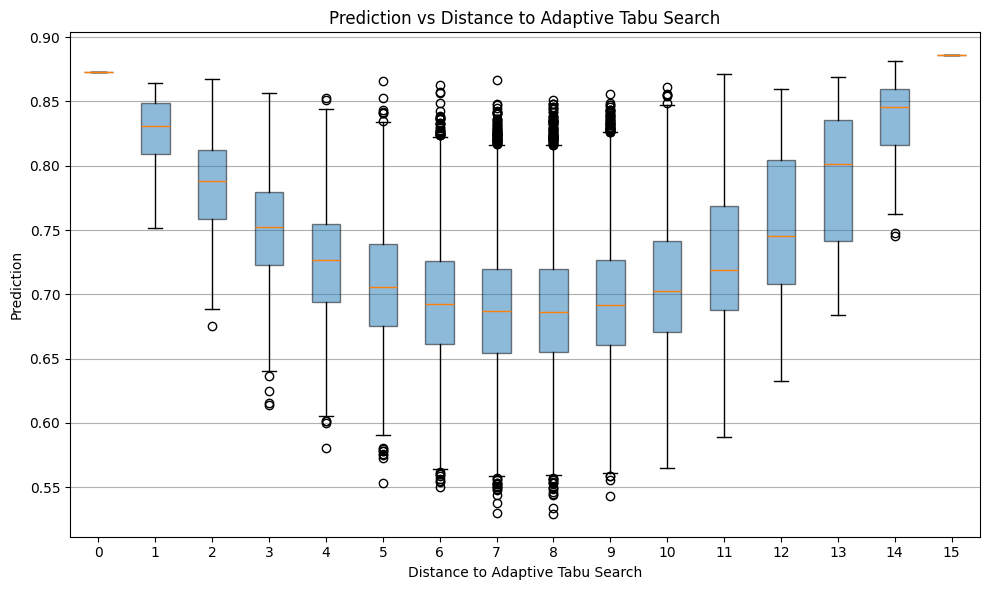

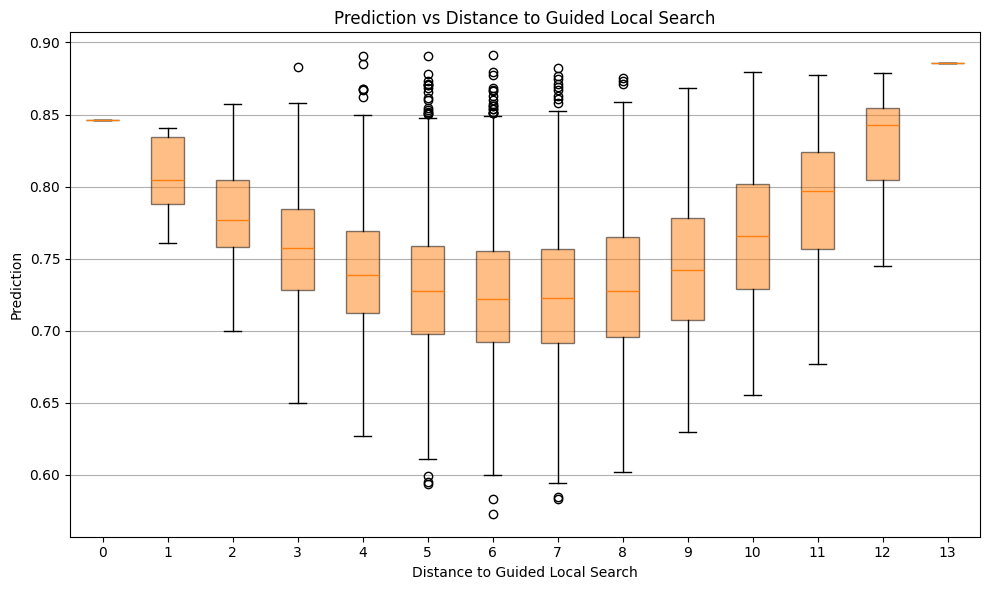

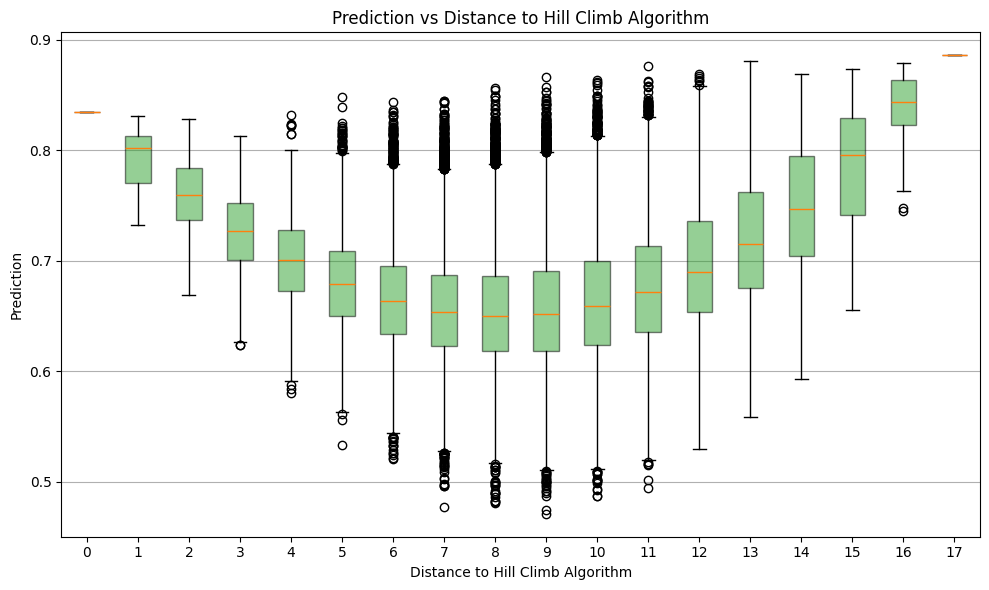

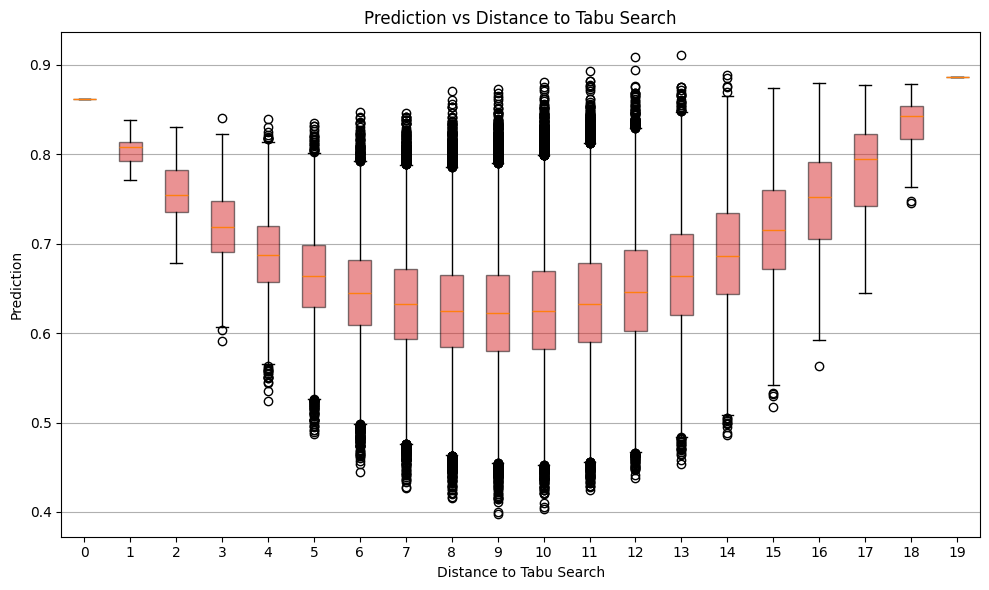

In [59]:
colors = {
    'Adaptive Tabu Search': 'tab:blue',
    'Guided Local Search': 'tab:orange',
    'Hill Climb Algorithm': 'tab:green',
    'Tabu Search': 'tab:red'
}

for key, values in sequence_results.items():
    dist_to_Bs = values['dist_to_Bs']
    predictions = values['predictions']

    dist_pred_map = {}
    for dist, pred in zip(dist_to_Bs, predictions):
        dist_pred_map.setdefault(dist, []).append(pred)

    sorted_distances = sorted(dist_pred_map.keys())
    box_data = [dist_pred_map[dist] for dist in sorted_distances]

    plt.figure(figsize=(10, 6))
    box = plt.boxplot(box_data, patch_artist=True, tick_labels=sorted_distances)

    for patch in box['boxes']:
        patch.set_facecolor(colors.get(key, 'gray'))
        patch.set_alpha(0.5)

    plt.xlabel(f'Distance to {key}')
    plt.ylabel('Prediction')
    plt.title(f'Prediction vs Distance to {key}')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [ ]:
tabu_df = pd.DataFrame({
    'sequence': sequence_results['Tabu Search']['hybrids'],
    'prediction': sequence_results['Tabu Search']['predictions'],
    'distance_to_GA': sequence_results['Tabu Search']['dist_to_Bs'],
})

tabu_df['sequence'] = tabu_df['sequence'].apply(lambda x: cnn.reverse_one_hot_sequence(x))
tabu_df = tabu_df.sort_values(by='prediction', ascending=False)
tabu_df.head()

sequence  prediction  \
503808  AATACTAGAGGTCTTCCGACTTGACAAAACCGGTTTATTCTATAAT...    0.910555   
520192  AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTTATTCTATAAT...    0.909152   
503809  AATACTAGAGGTCTTCCGACTTGACAAAACCGGTTTATTCTATAAT...    0.893595   
520193  AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTTATTCTATAAT...    0.892599   
499712  AATACTAGAGGTCTTCCGACTTGACAAAACCGGTATATTCTATAAT...    0.888707   

        distance_to_GA  
503808              13  
520192              12  
503809              12  
520193              11  
499712              14

In [102]:
print(GA)

tabu_df.head()['sequence'].values

reference_sequence = up + GA + down
for i in range(20, 50):
    print(seq[i] if all(seq[i] == reference_sequence[i] for seq in tabu_df.head()['sequence'].values) else ' ', end='')
print()

for idx, row in tabu_df.head(20).iterrows():
    sequence = row['sequence']
    prediction = row['prediction']
    print(sequence[20:50], prediction)

TTGACAACCGGGTTATATTCTATAATAATA
TTGACAA      T TATTCTATAATAAT 
TTGACAAAACCGGTTTATTCTATAATAATA 0.9105550050735474
TTGACAAAACCAGTTTATTCTATAATAATA 0.9091521501541138
TTGACAAAACCGGTTTATTCTATAATAATT 0.8935950994491577
TTGACAAAACCAGTTTATTCTATAATAATT 0.8925987482070923
TTGACAAAACCGGTATATTCTATAATAATA 0.8887068629264832
TTGACAACCGGGTTATATTCTATAATAATA 0.8859473466873169
TTGACAAACCCGGTTTATTCTATAATAATA 0.8852853178977966
TTGACAAAACCAGTTTATTCTATAATTATA 0.88230299949646
TTGACAAAACCGGTTTATTCTATAATAAAT 0.8819601535797119
TTGACAAAACCAGTTTATTCTATAATAAAT 0.8801144361495972
TTGACAACCGGGTTATAATTTATAATAATT 0.8798452019691467
TTGACAACCGGGTTATATTTTATAATAATA 0.8786320090293884
TTGACAAAACCAGTTTATTCTATAATATTA 0.8772460222244263
TTGACAACCGGGTTATAATTTATAATAATA 0.8771798610687256
TTGACAAAACCAGTATAATTTATAATAATA 0.8766592741012573
TTGACAAAACCGGTATAATTTATAATAATA 0.8765819072723389
TTGACAAAACGGTTATAATTTATAATAATA 0.8761934041976929
TTGACAAAACCGGTTTATTCTATAATATAA 0.875244140625
TTGACAAAAGGGTTATAATTTATAATAATT 0.87511634826

In [71]:
print(up + GA + down + ' GA')

for seq in tabu_df.head()['sequence']:
    print(seq)

print(up + sequences['Adaptive Tabu Search'] + down + ' Adaptive Tabu Search')

AATACTAGAGGTCTTCCGACTTGACAACCGGGTTATATTCTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG GA
AATACTAGAGGTCTTCCGACTTGACAAAACCGGTTTATTCTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG
AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTTATTCTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG
AATACTAGAGGTCTTCCGACTTGACAAAACCGGTTTATTCTATAATAATTGTGTGGGCGGGAAGACAACTAGGGG
AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTTATTCTATAATAATTGTGTGGGCGGGAAGACAACTAGGGG
AATACTAGAGGTCTTCCGACTTGACAAAACCGGTATATTCTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG
AATACTAGAGGTCTTCCGACTTGACAAAAATGGTAAATTTATTATACTATGTGTGGGCGGGAAGACAACTAGGGG Adaptive Tabu Search


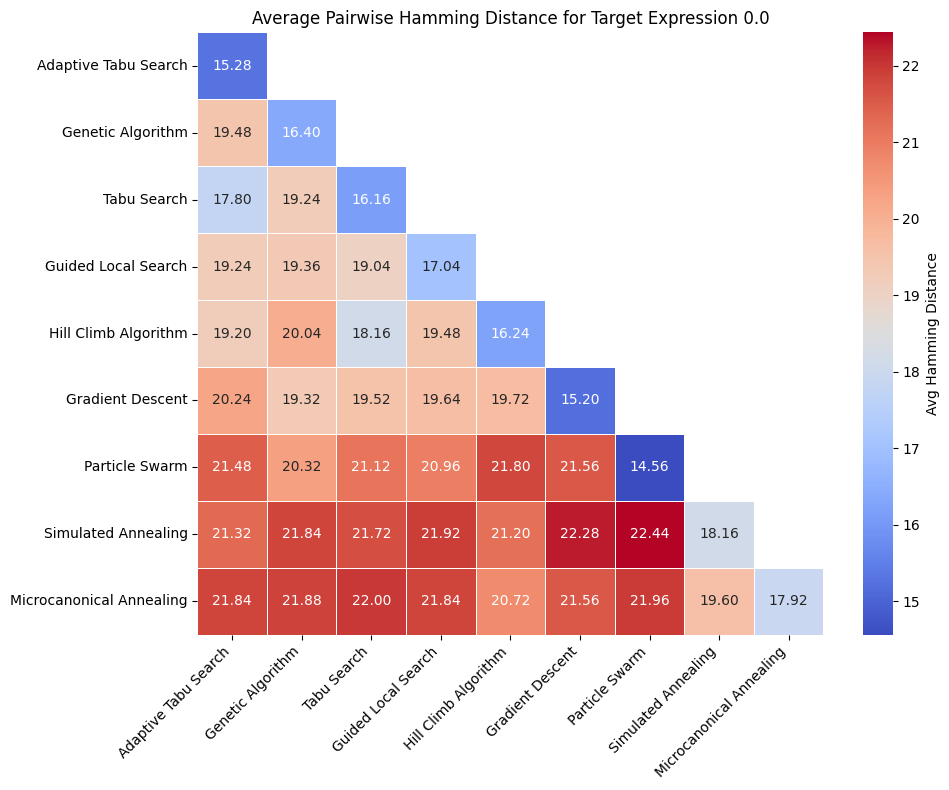

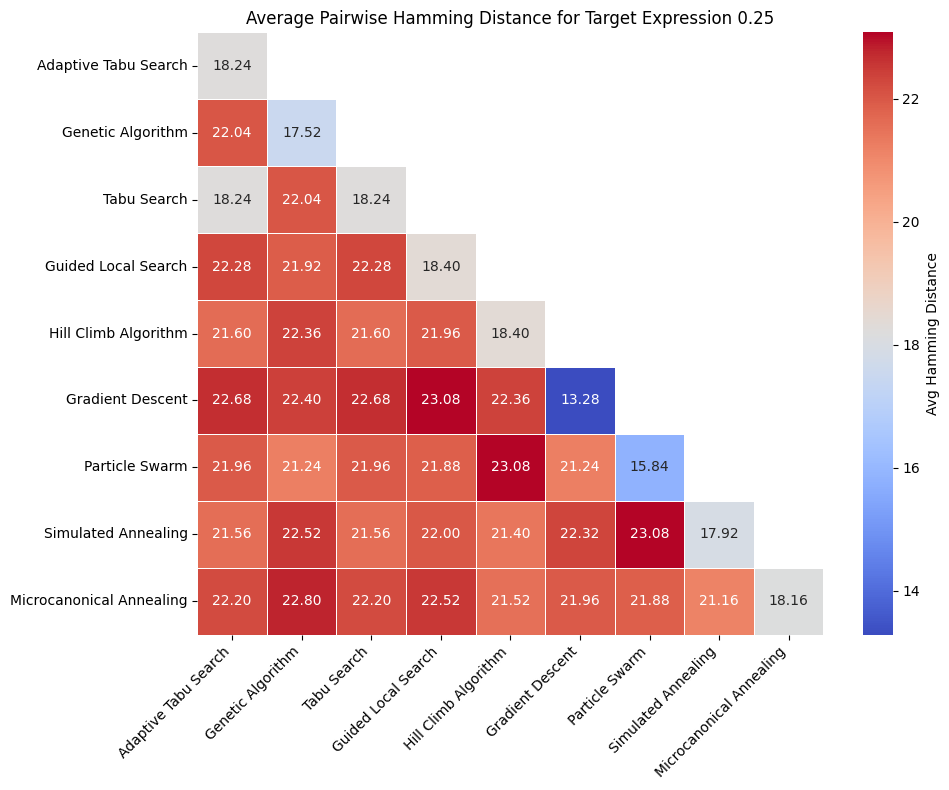

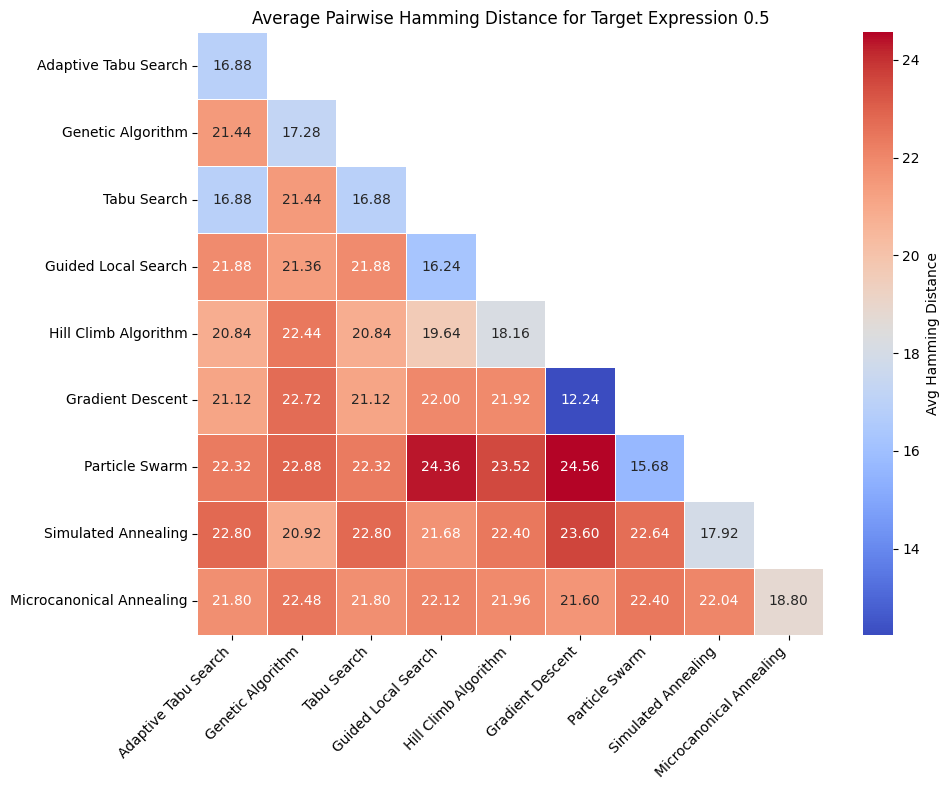

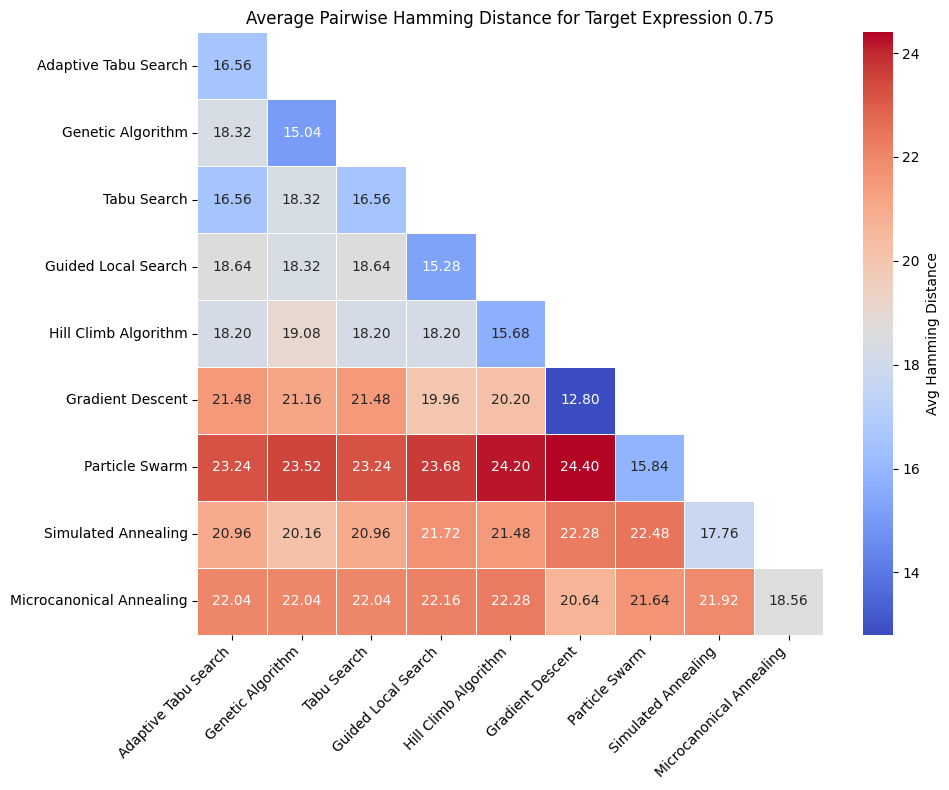

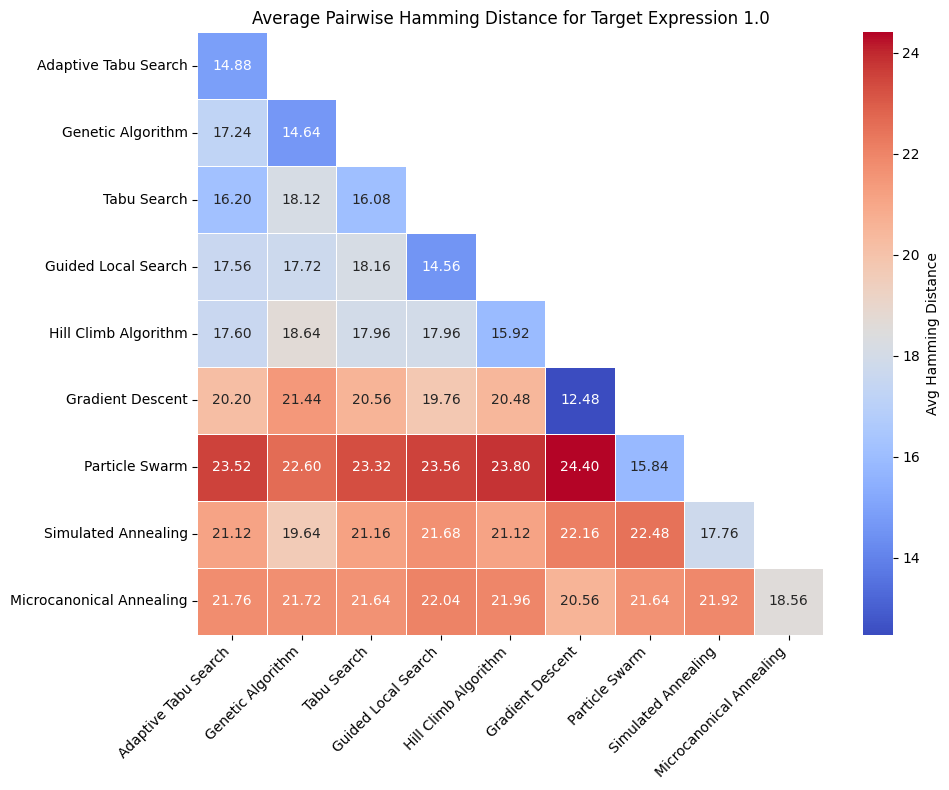

In [ ]:
# Load and preprocess data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df['prediction_history'] = results_df['prediction_history'].apply(ast.literal_eval)
results_df['error_history'] = results_df['error_history'].apply(ast.literal_eval)

target_expressions = results_df['target_expression'].unique()

# Determine global optimizer order by mean error
global_error_means = results_df.groupby('optimizer')['error'].mean()
global_sorted_optimizers = global_error_means.sort_values().index.tolist()

hamming_dfs = {}

# Compute average Hamming distance for all pairs of optimizers (including self-pairs)
for target in target_expressions:
    target_df = results_df[results_df['target_expression'] == target]

    hamming_matrix = pd.DataFrame(index=global_sorted_optimizers, columns=global_sorted_optimizers, dtype=float)

    for opt1, opt2 in product(global_sorted_optimizers, repeat=2):
        seqs1 = target_df[target_df['optimizer'] == opt1]['sequence'].tolist()
        seqs2 = target_df[target_df['optimizer'] == opt2]['sequence'].tolist()

        distances = []
        for s1 in seqs1:
            for s2 in seqs2:
                distances.append(hamming_distance(s1, s2))

        if distances:
            avg_distance = np.mean(distances)
        else:
            avg_distance = np.nan

        hamming_matrix.loc[opt1, opt2] = avg_distance

    hamming_dfs[target] = hamming_matrix

# Plot the Hamming distance matrices
for target, hamming_df in hamming_dfs.items():
    mask = np.triu(np.ones_like(hamming_df, dtype=bool), k=1)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        hamming_df,
        mask=mask,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Avg Hamming Distance'}
    )
    plt.title(f'Average Pairwise Hamming Distance for Target Expression {target}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')

results_df = best_tests(results_df)

min_error_preds = results_df.drop_duplicates(subset=['optimizer', 'target_expression'], keep='first')

pivot_df = min_error_preds.pivot(
    index='optimizer',
    columns='target_expression',
    values='prediction'
)

pivot_df.columns = [f'prediction (target_expression={col})' for col in pivot_df.columns]
pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)
pivot_df = pivot_df.reset_index()

pivot_df


optimizer  prediction (target_expression=0.0)  \
0         Genetic Algorithm                            0.107874   
1      Adaptive Tabu Search                            0.113416   
2               Tabu Search                            0.118780   
3       Guided Local Search                            0.120862   
4      Hill Climb Algorithm                            0.137827   
5          Gradient Descent                            0.134133   
6            Particle Swarm                            0.181424   
7       Simulated Annealing                            0.208723   
8  Microcanonical Annealing                            0.212349   

   prediction (target_expression=0.25)  prediction (target_expression=0.5)  \
0                             0.249999                            0.500000   
1                             0.250000                            0.500001   
2                             0.250000                            0.500001   
3                             0.250002                            0.499996   
4                             0.250009                            0.500015   
5                             0.249784                            0.487831   
6                             0.250005                            0.499646   
7                             0.250161                            0.507794   
8                             0.250067                            0.501824   

   prediction (target_expression=0.75)  prediction (target_expression=1.0)  
0                             0.749995                            0.885947  
1                             0.750004                            0.873045  
2                             0.750004                            0.861419  
3                             0.750144                            0.846510  
4                             0.749663                            0.834812  
5                             0.644957                            0.644957  
6                             0.586647                            0.586647  
7                             0.580200                            0.580200  
8                             0.513064                            0.513064